# Êñá‰ª∂ÂàÜÈ°û
‰∏ªË¶Å‰ΩøÁî®ÊñáÁ´†ËΩâDTM(document term matrix)ÁöÑÊñπÂºèÔºåÂ∞áÊñáÁ´†Áî®‰∏çÂêåÁöÑÂ≠óË©ûÂàÜÂ∏ÉË°®Á§∫ÔºåÂÜçÂà©Áî®pythonÁöÑsklearnÂ•ó‰ª∂ÔºåÂ•óÁî®Ê±∫Á≠ñÊ®π„ÄÅlogistic regressionÁ≠âÊñπÂºèË®ìÁ∑¥Ê®°ÂûãÔºå‰ª•ÂàÜËæ®‰∏çÂêåÁöÑÊñá‰ª∂„ÄÇÊú¨ÁØá Jupyter Notebook Â∞áÂ±ïÁ§∫„Äå‰∏≠Êñá„ÄçÁöÑÊñá‰ª∂ÂàÜÈ°ûÔºå‰ΩøÁî®dcardÁöÑ‰∏âÂÄãÁâàÂà•ÊñáÁ´†ÂÅöÁ§∫ÁØÑ„ÄÇ

## ÂàÜÊûêÁõÆÊ®ô
+ Ë≥áÊñôÂÖßÂÆπÔºö
    + Ë≥áÊñô‰æÜÊ∫êÔºöDcard
    + ÁâàÂà•ÔºöËÇ°Â∏Ç„ÄÅÁ©øÊê≠„ÄÅyoutuber

* ÂàÜÊûê‰∏ªÈ°åÔºöÂ∞á‰∏âÂÄãÁâàÂà•ÁöÑÊñáÁ´†ÂêàËµ∑‰æÜÔºåË®ìÁ∑¥Ê®°ÂûãËÉΩÈ†êÊ∏¨ÁâàÂà•ÔºåÂÜçÁî®ÂàÜÈ°ûÊ®°ÂûãÈÄ≤Ë°åÊñá‰ª∂ÁöÑÁâàÂà•ÂàÜÈ°û„ÄÇ

* Ê≠•È©üÔºö
    1. ËºâÂÖ•Â•ó‰ª∂
    2. Âü∫Êú¨ÁöÑÂàÜÈ°ûÊ®°ÂûãÊµÅÁ®ãÔºåÂåÖÂê´‰ª•‰∏ã‰∏âÊ≠•È©üÔºö
        * ÂâçËôïÁêÜ (preprocess)
        * Âª∫Ê®° (train model)
        * Ë©ï‰º∞ËàáÈ†êÊ∏¨ (evaluation and predict)
    3. cross validation
    4. ‰∏çÂêåÂàÜÈ°ûÂô®ÁöÑÊïàÊûú
    5. ÂèØËß£ÈáãÁöÑÂèØË¶ñÂåñÊ®°ÂûãÁµêÊûú
    6. È†êÊ∏¨ÂÖ∂‰ªñ‰æÜÊ∫êÁöÑË≥áÊñô‰∏¶ÈÄ≤Ë°åÊØîÂ∞ç

## 1. ËºâÂÖ•Â•ó‰ª∂

In [136]:
import re
from pprint import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import jieba
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, KFold
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve,
    RocCurveDisplay
)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

Ë®≠ÂÆö‰∏≠ÊñáÂ≠óÈ´î

In [137]:
import matplotlib
print(matplotlib.get_configdir())


/Users/tony/.matplotlib


Text(0.5, 1.0, 'ËÅ≤ÈáèÂúñ')

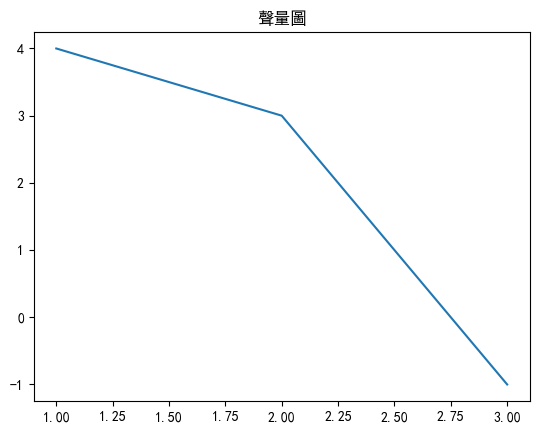

In [138]:
# https://zhuanlan.zhihu.com/p/566430362
# from matplotlib import font_manager
# font_set = {f.name for f in font_manager.fontManager.ttflist}
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.plot((1, 2, 3), (4, 3, -1))
plt.title("ËÅ≤ÈáèÂúñ")

## 2. ÊñáÂ≠óÂâçËôïÁêÜ
`sna2024s_7_a16a93362a_15.csv`,`sna2024s_7_a16a93362a_15-2.csv`,`sna2024s_7_a16a93362a_15-3.csv`Ë£°Èù¢ÂåÖÂê´‰∫ÜË¶ÅÈÄ≤Ë°åË®ìÁ∑¥ÁöÑË≥áÊñô„ÄÇ
- ÁâàÂà•ÔºöËÇ°Â∏Ç„ÄÅyoutuber„ÄÅÁ©øÊê≠
- ÊôÇÈñìÁØÑÂúçÔºö2024/01/01 ~ 2024/04/08
- Â∑•‰ΩúÊµÅÁ®ãÂπ≥Âè∞ÊêúÂ∞ã/ÊéíÈô§ÈóúÈçµÂ≠óÔºöÁÑ°

#### ‰∏âÁ≠ÜË≥áÊñôÈÉΩÂÄãÂà•Êé°ÂèñÂÖ∂‰∏≠400Á≠Ü‰∏¶ÈÄ≤Ë°åÂêà‰Ωµ

In [139]:
data1 = pd.read_csv('raw_data/sna2024s_7_a16a93362a_15.csv').head(400)
data2 = pd.read_csv('raw_data/sna2024s_7_a16a93362a_15-2.csv').head(400)
data3 = pd.read_csv('raw_data/sna2024s_7_a16a93362a_15-3.csv').head(400)
# Ê≠•È©ü 3: Âêà‰ΩµË≥áÊñô
combined_data = pd.concat([data1, data2, data3])

# Ê≠•È©ü 4: ÂÑ≤Â≠òÂà∞Êñ∞ÁöÑ CSV Ê™îÊ°à
combined_data.to_csv('combined_data.csv', index=False)

In [140]:
udn = pd.read_csv("combined_data.csv")  # ÂåØË≥áÊñô
udn.head(3)

system_id dataSource                                       artUrl  \
0          1      Dcard  https://www.dcard.tw/f/youtuber/p/255125589   
1          2      Dcard  https://www.dcard.tw/f/youtuber/p/255107233   
2          3      Dcard  https://www.dcard.tw/f/youtuber/p/255124706   

               artDate     artTitle  \
0  2024-03-30 13:21:10  ËóçÁãêÁç¥-ÂÖ®ËÅ∑ÊàÄ‰∫∫EP8   
1  2024-03-28 13:46:43   ÈÄôÁ®ÆÊà≤ÂäáÈÉΩÊ≤íËêΩ‰∫ÜÂóéÔºü   
2  2024-03-30 11:39:33  Èô™Ê≤àÂúòÁöÑÈß±Ê•äÂàÜÊâã‰∫ÜÂóéÔºü   

                                          artContent   boardID  commentCount  \
0  https://youtu.be/8YrYFDx6YLc?si=4RyVAs-8_hahbe...  youtuber            12   
1  ÂâõÂâõÊªëÂà∞ÈÄôÊîØÂΩ±Áâá\nÂÖ∂ÂØ¶Á´†È≠öÁáíÊ¢óË†ªÂ•ΩÁ¨ëÁöÑÊ¨∏\nÈÇÑÊúâ‰∫∫Âú®ÁúãÂêÑÁ®ÆÂêåÂ≠∏Âóé\nÁôºÁèæ‰ªñÂÄëÂæå‰æÜÁöÑÂΩ±ÁâáÂä†‰∫Ü...  youtuber             3   
2  ÂâçÈô£Â≠êÂú®Ê•äÁöÑÁßÅÂ∏≥ÁúãÂà∞ÈÄôÁØáÊñá‚¨áÔ∏è‚¨áÔ∏è\n\n\nÂÖ´Â©ÜÁõ¥Ë¶∫ÊòØÊÑüÊÉÖÂïèÈ°åü§îü§î\nÂä†‰∏äÂâõÊâçÁ™ÅÁÑ∂Êêú‰∏çÂà∞Ê•ä...  youtuber            22   

  department gender school  
0     ÁîüÁâ©ÁßëÊäÄÂ≠∏Á≥ª      M   ‰∫ûÊ¥≤Â§ßÂ≠∏  
1        NaN      M   Ëºî‰ªÅÂ§ßÂ≠∏  
2        NaN      M   Ëºî‰ªÅÂ§ßÂ≠∏

In [141]:
# ÁúãÁúãÊúâÂπæÁØáÊñáÁ´†
print(f"number of posts: {udn.shape[0]}")
# print(f"date range: {(udn['artDate'].min(), udn['artDate'].max())}")
print(f"category: \n{udn['boardID'].value_counts()}")

number of posts: 1200
category: 
boardID
youtuber    400
dressup     400
stock       400
Name: count, dtype: int64


+ 2.1 Êñ∑Âè•
+ 2.2 Êñ∑Ë©ûÔºàÂà™ÊéâÊ¨°Êï∏Â§™Â∞ëÁöÑ„ÄÅÊ®ôÈªûÁ¨¶Ëôü„ÄÅÂÅúÁî®Â≠óÔºâ

### 2.1 Ê∏ÖÁêÜ

Âà©Áî®ÂïèËôü„ÄÅÂè•ËôüÊàñÈ©öÂòÜËôüÁ≠âÁ¨¶ËôüÊñ∑Âè•ÔºåÊàñÊòØÂ¶ÇÊûúÂá∫Áèæ‰∏≠ÊñáÊàñÊòØËã±ÊñáÁöÑÁúÅÁï•ËôüÔºåÂÉèÊòØ`...`‰πüÊúÉÊñ∑Âè•ÔºåÊúÄÂæåË®≠ÂÆöÊúÉÂéªÈô§ÁµêÂ∞æÁöÑÁ©∫ÁôΩÁ¨¶Ëôü„ÄÇ

In [142]:
# ÈÅéÊøæ nan ÁöÑË≥áÊñô
udn = udn.dropna(subset=['artTitle'])
udn = udn.dropna(subset=['artContent'])
# ÁßªÈô§Á∂≤ÂùÄÊ†ºÂºè
udn["artContent"] = udn.artContent.apply(
    lambda x: re.sub("(http|https)://.*", "", x)
)
udn["artTitle"] = udn["artTitle"].apply(
    lambda x: re.sub("(http|https)://.*", "", x)
)
# Âè™Áïô‰∏ã‰∏≠ÊñáÂ≠ó
udn["artContent"] = udn.artContent.apply(
    lambda x: re.sub("[^\u4e00-\u9fa5]+", "", x)
)
udn["artTitle"] = udn["artTitle"].apply(
    lambda x: re.sub("[^\u4e00-\u9fa5]+", "", x)
)
udn.head(3)

system_id dataSource                                       artUrl  \
0          1      Dcard  https://www.dcard.tw/f/youtuber/p/255125589   
1          2      Dcard  https://www.dcard.tw/f/youtuber/p/255107233   
2          3      Dcard  https://www.dcard.tw/f/youtuber/p/255124706   

               artDate    artTitle  \
0  2024-03-30 13:21:10     ËóçÁãêÁç¥ÂÖ®ËÅ∑ÊàÄ‰∫∫   
1  2024-03-28 13:46:43   ÈÄôÁ®ÆÊà≤ÂäáÈÉΩÊ≤íËêΩ‰∫ÜÂóé   
2  2024-03-30 11:39:33  Èô™Ê≤àÂúòÁöÑÈß±Ê•äÂàÜÊâã‰∫ÜÂóé   

                                          artContent   boardID  commentCount  \
0  ÈÄôÈõÜÂ§ßÂÆ∂‰øÉËÜùÈï∑Ë´áË´áÁöÑÂæàÊ∑±ÂÖ•Ë´áÂà∞ÂêÑËá™ÁöÑÂÆ∂Â∫≠ÂíåÊàêÈï∑‰∏çÈÅéÂíåÊúâËá™Â∑±ÁöÑÈ°ßÊÖÆÊ≤íÊúâÊÉ≥ËÅäÈÇÑË´áÂà∞‰∫ÜÁ¥ÑÁ†≤Êâæ‰æÜÁöÑ‰æÜ...  youtuber            12   
1  ÂâõÂâõÊªëÂà∞ÈÄôÊîØÂΩ±ÁâáÂÖ∂ÂØ¶Á´†È≠öÁáíÊ¢óË†ªÂ•ΩÁ¨ëÁöÑÊ¨∏ÈÇÑÊúâ‰∫∫Âú®ÁúãÂêÑÁ®ÆÂêåÂ≠∏ÂóéÁôºÁèæ‰ªñÂÄëÂæå‰æÜÁöÑÂΩ±ÁâáÂä†‰∫Ü‰∏Ä‰∫õÊñ∞‰∫∫‰ΩÜÁèæ...  youtuber             3   
2  ÂâçÈô£Â≠êÂú®Ê•äÁöÑÁßÅÂ∏≥ÁúãÂà∞ÈÄôÁØáÊñáÂÖ´Â©ÜÁõ¥Ë¶∫ÊòØÊÑüÊÉÖÂïèÈ°åÂä†‰∏äÂâõÊâçÁ™ÅÁÑ∂Êêú‰∏çÂà∞Ê•äÁöÑÁßÅÂ∏≥Â•ΩÂÉèÈóúÁâà‰∫ÜÂÜçÂéªÈß±ÁöÑÁâàÊâæ...  youtuber            22   

  department gender school  
0     ÁîüÁâ©ÁßëÊäÄÂ≠∏Á≥ª      M   ‰∫ûÊ¥≤Â§ßÂ≠∏  
1        NaN      M   Ëºî‰ªÅÂ§ßÂ≠∏  
2        NaN      M   Ëºî‰ªÅÂ§ßÂ≠∏

ÊñáÁ´†ÁöÑÊ®ôÈ°å`artTitle`ÂíåÂÖßÊñá`sentence`ÈÉΩÊúÉÁ¥çÂÖ•ÂàÜÊûêÁöÑÂÖßÂÆπÔºåÊàêÁÇ∫Êñ∞ÁöÑ`content`Ê¨Ñ‰Ωç„ÄÇ

In [143]:
# Áïô‰∏ã content
udn["content"] = udn["artTitle"] + udn["artContent"]
udn = udn[["content", "artUrl", "boardID"]]  # ÊñáÁ´†ÂÖßÂÆπ ÊñáÁ´†ÈÄ£Áµê
udn.head()

content  \
0  ËóçÁãêÁç¥ÂÖ®ËÅ∑ÊàÄ‰∫∫ÈÄôÈõÜÂ§ßÂÆ∂‰øÉËÜùÈï∑Ë´áË´áÁöÑÂæàÊ∑±ÂÖ•Ë´áÂà∞ÂêÑËá™ÁöÑÂÆ∂Â∫≠ÂíåÊàêÈï∑‰∏çÈÅéÂíåÊúâËá™Â∑±ÁöÑÈ°ßÊÖÆÊ≤íÊúâÊÉ≥ËÅäÈÇÑË´áÂà∞...   
1  ÈÄôÁ®ÆÊà≤ÂäáÈÉΩÊ≤íËêΩ‰∫ÜÂóéÂâõÂâõÊªëÂà∞ÈÄôÊîØÂΩ±ÁâáÂÖ∂ÂØ¶Á´†È≠öÁáíÊ¢óË†ªÂ•ΩÁ¨ëÁöÑÊ¨∏ÈÇÑÊúâ‰∫∫Âú®ÁúãÂêÑÁ®ÆÂêåÂ≠∏ÂóéÁôºÁèæ‰ªñÂÄëÂæå‰æÜÁöÑÂΩ±...   
2  Èô™Ê≤àÂúòÁöÑÈß±Ê•äÂàÜÊâã‰∫ÜÂóéÂâçÈô£Â≠êÂú®Ê•äÁöÑÁßÅÂ∏≥ÁúãÂà∞ÈÄôÁØáÊñáÂÖ´Â©ÜÁõ¥Ë¶∫ÊòØÊÑüÊÉÖÂïèÈ°åÂä†‰∏äÂâõÊâçÁ™ÅÁÑ∂Êêú‰∏çÂà∞Ê•äÁöÑÁßÅÂ∏≥Â•Ω...   
3  ÊÉ≥ÂàÜ‰∫´‰∏Ä‰∏ãËá™Â∑±ÁöÑÈÅäÊà≤È†ªÈÅìÊÉ≥ÂàÜ‰∫´‰∏Ä‰∏ãËá™Â∑±ÁöÑÈ†ªÈÅìÂâõÂâõËµ∑Ê≠•‰∏ªË¶ÅÊòØÁ≤µË™ûÈÖçÁπÅÈ´î‰∏≠ÊñáÂ≠óÂπïÂ§ßÂÆ∂ÊúâËààË∂£ÂèØ‰ª•Ë©¶...   
4  ÂøÉÁ¢éËôêÁ´•Á¥∞ÁØÄÊõùÂÖâÁ´üÁ®±Ë¶™ÂÖíÊòØÊÉ°È≠îËøëÊó•ÁæéÂúã‰∏ÄËµ∑ËôêÁ´•Ê°à‰ª∂ÈúáÈ©öÂêÑÁïåÂú®È†ªÈÅìÁèæÂ∑≤Ë¢´Âà™Èô§‰ª•ÂàÜ‰∫´ÂÆ∂Â∫≠ËÇ≤ÂÖíÁ∂ìÈ©ó...   

                                        artUrl   boardID  
0  https://www.dcard.tw/f/youtuber/p/255125589  youtuber  
1  https://www.dcard.tw/f/youtuber/p/255107233  youtuber  
2  https://www.dcard.tw/f/youtuber/p/255124706  youtuber  
3  https://www.dcard.tw/f/youtuber/p/255115766  youtuber  
4  https://www.dcard.tw/f/youtuber/p/255105636  youtuber

In [144]:
# ÁúãÁúãÊúâÂπæÁØáÊñáÁ´†
print(f"total docs: {udn.shape[0]}")


total docs: 1166


### 2.2 Êñ∑Ë©û

In [145]:
# Ë®≠ÂÆöÁπÅÈ´î‰∏≠ÊñáË©ûÂ∫´
jieba.set_dictionary("./dict/dict.txt.big")

# ËºâÂÖ•Ëá™ÂÆöÁæ©Ëæ≠ÂÖ∏Ôºö‰∏ÄÂÄãË©û‰∏ÄË°åÔºåÊØèË°åÂàÜË©ûË™û„ÄÅË©ûÈ†ª(ÂèØÁúÅ)„ÄÅË©ûÊÄß(ÂèØÁúÅ)
jieba.load_userdict("dict/user_dict.txt")

# Êñ∞Â¢ûstopwords
# jieba.analyse.set_stop_words('./dict/stop_words.txt') #jieba.analyse.extract_tagsÊâçÊúÉ‰ΩúÁî®
with open("./dict/stop_words.txt", encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

Building prefix dict from /Users/tony/Desktop/MIS581/SMA_2nd/week7/dict/dict.txt.big ...
Loading model from cache /var/folders/dd/3xjn4tx56812dj8npgdggkh40000gn/T/jieba.u72a33dfcb9d11d9cc7f82fd9c6265fcd.cache
Loading model cost 0.501 seconds.
Prefix dict has been built successfully.


In [146]:
# Ë®≠ÂÆöÊñ∑Ë©û function
def getToken(row):
    seg_list = jieba.cut(row, cut_all=False)
    seg_list = [
        w for w in seg_list if w not in stopWords and len(w) > 1
    ]  # ÁØ©ÈÅ∏ÊéâÂÅúÁî®Â≠óËàáÂ≠óÂÖÉÊï∏Â§ßÊñº1ÁöÑË©ûÂΩô
    return seg_list

In [147]:
udn["words"] = udn["content"].apply(getToken).map(" ".join)
udn.head()

content  \
0  ËóçÁãêÁç¥ÂÖ®ËÅ∑ÊàÄ‰∫∫ÈÄôÈõÜÂ§ßÂÆ∂‰øÉËÜùÈï∑Ë´áË´áÁöÑÂæàÊ∑±ÂÖ•Ë´áÂà∞ÂêÑËá™ÁöÑÂÆ∂Â∫≠ÂíåÊàêÈï∑‰∏çÈÅéÂíåÊúâËá™Â∑±ÁöÑÈ°ßÊÖÆÊ≤íÊúâÊÉ≥ËÅäÈÇÑË´áÂà∞...   
1  ÈÄôÁ®ÆÊà≤ÂäáÈÉΩÊ≤íËêΩ‰∫ÜÂóéÂâõÂâõÊªëÂà∞ÈÄôÊîØÂΩ±ÁâáÂÖ∂ÂØ¶Á´†È≠öÁáíÊ¢óË†ªÂ•ΩÁ¨ëÁöÑÊ¨∏ÈÇÑÊúâ‰∫∫Âú®ÁúãÂêÑÁ®ÆÂêåÂ≠∏ÂóéÁôºÁèæ‰ªñÂÄëÂæå‰æÜÁöÑÂΩ±...   
2  Èô™Ê≤àÂúòÁöÑÈß±Ê•äÂàÜÊâã‰∫ÜÂóéÂâçÈô£Â≠êÂú®Ê•äÁöÑÁßÅÂ∏≥ÁúãÂà∞ÈÄôÁØáÊñáÂÖ´Â©ÜÁõ¥Ë¶∫ÊòØÊÑüÊÉÖÂïèÈ°åÂä†‰∏äÂâõÊâçÁ™ÅÁÑ∂Êêú‰∏çÂà∞Ê•äÁöÑÁßÅÂ∏≥Â•Ω...   
3  ÊÉ≥ÂàÜ‰∫´‰∏Ä‰∏ãËá™Â∑±ÁöÑÈÅäÊà≤È†ªÈÅìÊÉ≥ÂàÜ‰∫´‰∏Ä‰∏ãËá™Â∑±ÁöÑÈ†ªÈÅìÂâõÂâõËµ∑Ê≠•‰∏ªË¶ÅÊòØÁ≤µË™ûÈÖçÁπÅÈ´î‰∏≠ÊñáÂ≠óÂπïÂ§ßÂÆ∂ÊúâËààË∂£ÂèØ‰ª•Ë©¶...   
4  ÂøÉÁ¢éËôêÁ´•Á¥∞ÁØÄÊõùÂÖâÁ´üÁ®±Ë¶™ÂÖíÊòØÊÉ°È≠îËøëÊó•ÁæéÂúã‰∏ÄËµ∑ËôêÁ´•Ê°à‰ª∂ÈúáÈ©öÂêÑÁïåÂú®È†ªÈÅìÁèæÂ∑≤Ë¢´Âà™Èô§‰ª•ÂàÜ‰∫´ÂÆ∂Â∫≠ËÇ≤ÂÖíÁ∂ìÈ©ó...   

                                        artUrl   boardID  \
0  https://www.dcard.tw/f/youtuber/p/255125589  youtuber   
1  https://www.dcard.tw/f/youtuber/p/255107233  youtuber   
2  https://www.dcard.tw/f/youtuber/p/255124706  youtuber   
3  https://www.dcard.tw/f/youtuber/p/255115766  youtuber   
4  https://www.dcard.tw/f/youtuber/p/255105636  youtuber   

                                               words  
0  ËóçÁãê ÂÖ®ËÅ∑ ÊàÄ‰∫∫ ÈÄôÈõÜ ‰øÉËÜùÈï∑Ë´á Ê∑±ÂÖ• Ë´áÂà∞ ÂÆ∂Â∫≠ ÊàêÈï∑ È°ßÊÖÆ ËÅäÈÇÑ Ë´áÂà∞ Êâæ‰æÜ ‰æÜË≥ì ÂπæÂÄã...  
1   Êà≤Âäá Ê≤íËêΩ ÂâõÂâõ ÊªëÂà∞ ÈÄôÊîØ ÂΩ±Áâá Á´†È≠öÁáí Ê¢óË†ª Â•ΩÁ¨ë ÂêåÂ≠∏ ÁôºÁèæ ÂΩ±Áâá ‰∏Ä‰∫õ Êñ∞‰∫∫ ÁèæÂú® Â•ΩÂÉè  
2  Ê≤àÂúò Èß±Ê•ä ÂàÜÊâã Èô£Â≠ê ÁßÅÂ∏≥ ÁúãÂà∞ ÈÄôÁØá ÊñáÂÖ´Â©Ü Áõ¥Ë¶∫ ÊÑüÊÉÖ ÂïèÈ°å Á™ÅÁÑ∂ ‰∏çÂà∞ ÁßÅÂ∏≥ Â•ΩÂÉè ...  
3  ÂàÜ‰∫´ ‰∏Ä‰∏ã ÈÅäÊà≤ È†ªÈÅì ÂàÜ‰∫´ ‰∏Ä‰∏ã È†ªÈÅì ÂâõÂâõ Ëµ∑Ê≠• ‰∏ªË¶Å Á≤µË™û ÁπÅÈ´î‰∏≠Êñá Â≠óÂπï ËààË∂£ Ë©¶Ë©¶...  
4  ÂøÉÁ¢é ËôêÁ´• Á¥∞ÁØÄ ÊõùÂÖâ Á´üÁ®± Ë¶™ÂÖí ÊÉ°È≠î ËøëÊó• ÁæéÂúã ‰∏ÄËµ∑ ËôêÁ´• Ê°à‰ª∂ ÈúáÈ©ö ÂêÑÁïå È†ªÈÅì Áèæ...

### 2.3 Ë≥áÊñôÈõÜÂü∫Êú¨Ê™¢Ë¶ñ

Ê™¢Ë¶ñË≥áÊñôÂÖßÂÆπ

In [148]:
print(f"total posts: {len(udn['artUrl'].unique())}")
print(f"category: \n{udn['boardID'].value_counts()}")


total posts: 1166
category: 
boardID
youtuber    399
dressup     389
stock       378
Name: count, dtype: int64


## 3. ÂàÜÈ°ûÊ®°ÂûãÁöÑË®ìÁ∑¥ÊµÅÁ®ã
### 3.1 Ê†πÊìö7:3ÁöÑÊØî‰æãÂàáÂàÜË≥áÊñôÈõÜ
Âà©Áî® sklearn ‰∏≠ÁöÑ train_test_split ÂáΩÊï∏Â∞á `raw_data` Èö®Ê©üÂàáÊàê 7:3ÔºåË®≠ÁΩÆ random_state ËÆìÊØèÊ¨°ÂàáÂàÜÁöÑÁµêÊûú‰∏ÄËá¥„ÄÇ`y_train`Âíå`y_test`ÂàÜÂà•ÁÇ∫Ë®ìÁ∑¥Ë≥áÊñôÂíåÊ∏¨Ë©¶Ë≥áÊñôÁöÑÈ†êÊ∏¨ÁõÆÊ®ô„ÄÇ

In [149]:
data = udn
X = data["words"]
y = data["boardID"]

# ÊääÊï¥ÂÄãË≥áÊñôÈõÜ‰∏É‰∏âÂàá
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=777
)

print(X_train.head())
print(y_train.head())

1022    Ë´ãÁõä ÁñëÂïè Ê∞∏Ë±ê Â§ßÊà∂ Â†±ÈÖ¨ Ë©¶ÁÆó Ë´ãÂïè Êúâ‰∫∫ Áü•ÈÅì Ê∞∏Ë±ê Â§ßÊà∂ Â†±ÈÖ¨ ÁÆóÊòØ ‰∏Ä‰∏ã ËºùÈÅî Á∏æ...
374     ÈõªÈ°û ÁßëÁ≥ª Â§ßÂ≠∏ Á†îÁ©∂ÊâÄ Â∑ÆÁï∞ ÈôΩÊòé ‰∫§ÈÄö Â§ßÂ≠∏ ÈõªÂ≠ê Á†îÁ©∂ÊâÄ ÂØ¶È©óÂÆ§ Êó•Â∏∏ Â•Ω‰πÖÊ≤í Ââ™Áâá ...
256     ËóçÁãê Ë´ãÂïè Êúâ‰∫∫ Ë®òÂæó ‰πãÂâç ËóçÁãê ËíôÊúâ ‰∫§Âèã ËªüÈ´î Âêà‰Ωú ÊúÉÂì° ÂÖçË≤ª ‰∏ÄÂÄãÊúà ÂΩ±Áâá ‰∏çÂà∞ ...
397                               ÈõªËÖ¶ ÊîπÁâà ‰ªäÂ§© ÊâìÈñã ÁôºÁèæ Êúâ‰∫∫ ÊúâËÆä ÁøíÊÖ£
1016    Ê≥¢Êµ™ÁêÜË´ñ Áï∂ÁöÑ Â•óÂà© ‰∏ãËªä ÂÉπÂÄº ÊäïË≥á Âπ¥ÊúàÊó• Êò•ÂàÜ ÈÅéÂæå Á¨¨‰∏ÄÂÄã ‰∫§ÊòìÊó• Âä†Ê¨äÊåáÊï∏ È¶ñÊ¨° ...
Name: words, dtype: object
1022       stock
374     youtuber
256     youtuber
397     youtuber
1016       stock
Name: boardID, dtype: object


In [150]:
# Áúã‰∏Ä‰∏ãÂêÑÂÄãË≥áÊñôÈõÜÂàáÂàÜÁöÑÊØî‰æãÔºåÊáâË©≤Ë¶Å‰∏ÄËá¥
print(
    f"raw data percentage :\n{data['boardID'].value_counts(normalize=True) * 100}"
)
print(f"\ntrain percentage :\n{y_train.value_counts(normalize=True) * 100}")
print(f"\ntest percentage :\n{y_test.value_counts(normalize=True) * 100}")

raw data percentage :
boardID
youtuber    34.219554
dressup     33.361921
stock       32.418525
Name: proportion, dtype: float64

train percentage :
boardID
youtuber    35.784314
stock       32.720588
dressup     31.495098
Name: proportion, dtype: float64

test percentage :
boardID
dressup     37.714286
stock       31.714286
youtuber    30.571429
Name: proportion, dtype: float64


### 3.2 Â∞áÊñáÁ´†ËΩâÁÇ∫ DTM

DTM(document term matrix) :
+ Â∞á‰∏çÂêåÁöÑÊñáÁ´† (document) ‰ª•ÊñáÁ´†‰∏≠Âá∫ÁèæÈÅéÁöÑÂ≠óË©û(term)Ë°®Á§∫
    + row ÊòØdocument (Êñá‰ª∂)
    + column ÊòØÂ≠óË©û (term)
    + row ÂÖßÁöÑÊï∏Â≠óÊòØÂá∫ÁèæÁöÑÂ≠óÊï∏

DTMË£°Èù¢ÁöÑÂÄºÂèØ‰ª•Êúâ‰∏çÂêåÁöÑË°®Á§∫ÊñπÊ≥ï
+ (1) ‰æùÊìöË©ûÈ†ª (classic BoW)
    + Áî® `CountVectorizer()`
    + unigrams and bigrams
    + [sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
+ (2) ‰æùÊìötfidf (advanced variant of BoW)
    + ÁØ©ÈÅ∏Âá∫ÁèæÊ¨°Êï∏Â§ßÊñº10ÁöÑÂ≠ó
    + Áî® `TfidfVectorizer()`
    + [sklearn.feature_extraction.text.TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
+ Â∏∏Áî®ÂèÉÊï∏‰ªãÁ¥π
    + max_features: Âèñ Ë©ûÈ†ª / tfidf ÂâçÂ§öÂ∞ëÁöÑÂ≠ó

### 3.3 Â•óÂÖ•Ê≠£ÂºèÁöÑË≥áÊñôÈõÜ
+  Ê®°ÂûãË®ìÁ∑¥ÁØÑ‰æã: logistic regression + cv tokenizer

In [151]:
vectorizer = CountVectorizer(max_features=1000)
print(vectorizer)

CountVectorizer(max_features=1000)


In [152]:
X_train.head()

1022    Ë´ãÁõä ÁñëÂïè Ê∞∏Ë±ê Â§ßÊà∂ Â†±ÈÖ¨ Ë©¶ÁÆó Ë´ãÂïè Êúâ‰∫∫ Áü•ÈÅì Ê∞∏Ë±ê Â§ßÊà∂ Â†±ÈÖ¨ ÁÆóÊòØ ‰∏Ä‰∏ã ËºùÈÅî Á∏æ...
374     ÈõªÈ°û ÁßëÁ≥ª Â§ßÂ≠∏ Á†îÁ©∂ÊâÄ Â∑ÆÁï∞ ÈôΩÊòé ‰∫§ÈÄö Â§ßÂ≠∏ ÈõªÂ≠ê Á†îÁ©∂ÊâÄ ÂØ¶È©óÂÆ§ Êó•Â∏∏ Â•Ω‰πÖÊ≤í Ââ™Áâá ...
256     ËóçÁãê Ë´ãÂïè Êúâ‰∫∫ Ë®òÂæó ‰πãÂâç ËóçÁãê ËíôÊúâ ‰∫§Âèã ËªüÈ´î Âêà‰Ωú ÊúÉÂì° ÂÖçË≤ª ‰∏ÄÂÄãÊúà ÂΩ±Áâá ‰∏çÂà∞ ...
397                               ÈõªËÖ¶ ÊîπÁâà ‰ªäÂ§© ÊâìÈñã ÁôºÁèæ Êúâ‰∫∫ ÊúâËÆä ÁøíÊÖ£
1016    Ê≥¢Êµ™ÁêÜË´ñ Áï∂ÁöÑ Â•óÂà© ‰∏ãËªä ÂÉπÂÄº ÊäïË≥á Âπ¥ÊúàÊó• Êò•ÂàÜ ÈÅéÂæå Á¨¨‰∏ÄÂÄã ‰∫§ÊòìÊó• Âä†Ê¨äÊåáÊï∏ È¶ñÊ¨° ...
Name: words, dtype: object

In [153]:
vectorizer.fit(X_train)
vec_train = vectorizer.transform(X_train)
vec_train

<816x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 20567 stored elements in Compressed Sparse Row format>

In [154]:
### Áî® `toarray()` ËΩâÊàê numpy array
vec_train.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [155]:
# ÂèØÁî® `fit_transform()` ‰∏ÄÊ¨°ÂÆåÊàê
vec_train = vectorizer.fit_transform(X_train)
print(vectorizer.get_feature_names_out()[:10])


['‰∏Ä‰∏ã' '‰∏Ä‰∫õ' '‰∏Ä‰ª∂' '‰∏Ä‰Ωç' '‰∏ÄÂÄãÊúà' '‰∏ÄÂçä' '‰∏ÄÂ†Ü' '‰∏ÄÂ§©' '‰∏ÄÂ•ó' '‰∏ÄÂÆö']


In [156]:
# fit ÂÆåÂæåÔºåÂèØ‰ª•Áî® `vocabulary_` ÁúãÂà∞Ë©ûÁöÑ feature index
print(vectorizer.vocabulary_)
vectorizer.vocabulary_['ËÇ°Á•®']

{'Ë´ãÁõä': 816, 'Ê∞∏Ë±ê': 555, 'Â†±ÈÖ¨': 249, 'Ë´ãÂïè': 814, 'Êúâ‰∫∫': 501, 'Áü•ÈÅì': 652, 'ÁÆóÊòØ': 687, '‰∏Ä‰∏ã': 0, 'ËºùÈÅî': 864, 'Á∏æÊïà': 720, 'Ë¶∫Âæó': 786, 'Êï∏Â≠ó': 461, 'ÂÅáË®≠': 113, '‰∏ÄÂÄãÊúà': 4, 'ÈÄ£Á∫å': 890, 'Â§ßÂ≠∏': 261, 'Â∑ÆÁï∞': 324, 'ÈõªÂ≠ê': 960, 'Êó•Â∏∏': 475, 'ÊúÄËøë': 498, '‰ªäÂ§©': 82, 'ËóçÁãê': 763, 'Ë®òÂæó': 797, '‰πãÂâç': 67, 'Âêà‰Ωú': 204, 'ÊúÉÂì°': 500, 'ÂΩ±Áâá': 356, '‰∏çÂà∞': 50, 'ÁôºÁèæ': 623, 'ÁøíÊÖ£': 728, 'ÂÉπÂÄº': 121, 'ÊäïË≥á': 408, 'Âä†Ê¨äÊåáÊï∏': 167, 'Á∂≠ÊåÅ': 711, 'ÈôçÊÅØ': 949, 'Ë≤∑Áõ§': 828, 'ÈÄ≤Â†¥': 894, 'Êî∂Áõ§ÂÉπ': 447, 'Á¥ØÁ©ç': 699, 'ÊúüÈñì': 515, 'ÊúâË∂£': 507, 'Áï∂Âàù': 617, 'ÈÄ†Êàê': 888, 'ÁßëÊäÄ': 667, 'Âè∞ÁÅ£': 201, 'Âè∞Á©ç': 202, 'ÊôÇÈñì': 485, 'Ê≠∑Âè≤': 542, 'Êº≤ÂπÖ': 577, 'ÁõÆÁöÑ': 636, 'ÂçäÂ∞éÈ´î': 176, '‰∏äÊº≤': 33, 'È†êÊúü': 972, 'ÁáüÊî∂': 585, 'Ëá≥Â∞ë': 752, 'ÊàêÈï∑': 395, '‰∏ÄÂπ¥': 10, 'ÁõÆÂâç': 633, '‰ΩéÈªû': 98, 'ÂõûÊ∏¨': 233, 'È´òÈªû': 993, 'Â∞±Ë¶Å': 314, 'ÂÆπÊòì': 301, '‰∏ªË¶Å': 65, 'Â£ìÂäõ': 253, 'ÈÅøÂÖç': 909, 'ÈÄ≤Â

742

In [157]:
# ‰∏çÈúÄÈáçÊñ∞ `fit()` dataÔºåÂõ†ÂâçÈù¢Â∑≤Á∂ì `fit()` ÈÅé‰∫Ü
# Âè™ÈúÄÂ∞áÊ∏¨Ë©¶Êï∏Êìö‰ΩøÁî®‰πãÂâçË®ìÁ∑¥Â•ΩÁöÑ vectorizer ËΩâÊèõÁÇ∫Áõ∏ÂêåÁöÑÁâπÂæµË°®Á§∫ÂΩ¢ÂºèÔºåËÄå‰∏çÈúÄË¶ÅÈáçÊñ∞fit„ÄÇ
# Â¶ÇÊûúÂ∞çÊ∏¨Ë©¶Êï∏ÊìöÂÜçÊ¨° fit vectorizerÔºåÂèØËÉΩÊúÉÂ∞éËá¥‰ΩøÁî®‰∫ÜÊ∏¨Ë©¶Êï∏ÊìöÁöÑ‰ø°ÊÅØÔºåÈÄ≤ËÄåÂ∞éËá¥Ê®°ÂûãÁöÑ‰∏çÁ©©ÂÆöÊÄßÂíåÈÅéÂ∫¶Êì¨ÂêàÁöÑÂïèÈ°å„ÄÇ
vec_test = vectorizer.transform(X_test)
print(vec_train.shape)
print(vec_test.shape)

(816, 1000)
(350, 1000)


In [158]:
# Âª∫Á´ãÂàÜÈ°ûÂô®Ê®°Âûã
clf = LogisticRegression()
clf.fit(vec_train, y_train)
clf

LogisticRegression()

In [159]:
clf.classes_

array(['dressup', 'stock', 'youtuber'], dtype=object)

In [160]:
y_pred = clf.predict(vec_test)
y_pred_proba = clf.predict_proba(vec_test)
print(y_pred[:10])

['stock' 'stock' 'dressup' 'dressup' 'youtuber' 'youtuber' 'youtuber'
 'dressup' 'youtuber' 'stock']


In [161]:
print(y_pred_proba.shape)
y_pred_proba[0,:]

(350, 3)


array([0.11699894, 0.82359783, 0.05940323])

In [162]:
## Accuracy, Precision, Recall, F1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     dressup       0.92      0.92      0.92       132
       stock       0.94      0.92      0.93       111
    youtuber       0.90      0.93      0.91       107

    accuracy                           0.92       350
   macro avg       0.92      0.92      0.92       350
weighted avg       0.92      0.92      0.92       350



In [163]:
classes = clf.classes_
cm = confusion_matrix(y_test, y_pred)
cm

array([[121,   4,   7],
       [  5, 102,   4],
       [  6,   2,  99]])

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'dressup'), Text(0, 1.5, 'stock'), Text(0, 2.5, 'youtuber')])

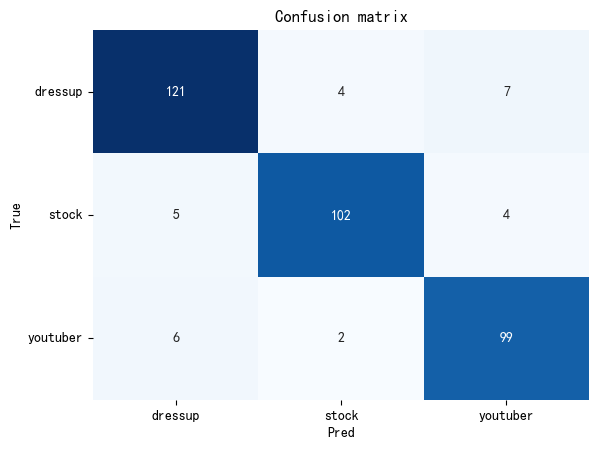

In [164]:
## Plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(
    xlabel="Pred",
    ylabel="True",
    xticklabels=classes,
    yticklabels=classes,
    title="Confusion matrix",
)
plt.yticks(rotation=0)

### 3.4 tfidf

ÊîπË©¶Ë©¶Áúã‰ΩøÁî® tf-idf ÁöÑ DTM ‰æÜ‰ª£Ë°®ÊñáÁ´†ÔºåË®ìÁ∑¥ÂàÜÈ°ûÊ®°ÂûãÁöÑÊïàÊûú

In [165]:
vectorizer = TfidfVectorizer(max_features=1000)
vec_train = vectorizer.fit_transform(X_train)
vec_test = vectorizer.transform(X_test)
vec_train.toarray()[0,:]

array([0.12789638, 0.        , 0.        , 0.        , 0.20545026,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [166]:
clf.fit(vec_train, y_train)
y_pred = clf.predict(vec_test)
y_pred_proba = clf.predict_proba(vec_test)

# results
## Accuracy, Precision, Recall, F1-score
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     dressup       0.93      0.96      0.95       132
       stock       0.97      0.95      0.96       111
    youtuber       0.94      0.93      0.93       107

    accuracy                           0.95       350
   macro avg       0.95      0.95      0.95       350
weighted avg       0.95      0.95      0.95       350



### 3.5 CV

Êé•Ëëó‰ªãÁ¥π cross-validation„ÄÇCV Âú®Ê©üÂô®Â≠∏Áøí‰∏≠ÔºåÊòØ‰∏ÄÂÄãÂæàÂ∏∏Áî®‰æÜËÆìÊ®°ÂûãË©ï‰º∞ËÉΩÂ§†ÂæóÂà∞Êõ¥Á©©ÂÆöÁöÑÊï∏ÂÄºÁöÑÊâãÊ≥ï„ÄÇ

* figure1: 

<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png"  width="1000">

* figure 2:  

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

source: <https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-and-model-selection>

cross-validation ÊúÉËá™ÂãïÂàáÊàê k ÁµÑ train-test dataset„ÄÇ  
`cross_validate()` ÊúÉÂõûÂÇ≥Á∂ìÈÅé cross-validation ÁöÑÊ®°ÂûãË©ï‰º∞ÁµêÊûú„ÄÇ

In [167]:
clf = LogisticRegression()
vec_train = TfidfVectorizer(max_features=1000).fit_transform(X_train)

scores = cross_validate(clf, vec_train, y_train, cv=5, scoring=("f1_macro", "recall_macro", "precision_macro"), return_estimator=True)
pprint(scores)

{'estimator': [LogisticRegression(),
               LogisticRegression(),
               LogisticRegression(),
               LogisticRegression(),
               LogisticRegression()],
 'fit_time': array([0.00908899, 0.00997996, 0.0075438 , 0.00792766, 0.00826311]),
 'score_time': array([0.0027411 , 0.00262809, 0.00269413, 0.00268531, 0.00350094]),
 'test_f1_macro': array([0.93377215, 0.9496092 , 0.9254072 , 0.91349665, 0.96386297]),
 'test_precision_macro': array([0.93560484, 0.95183647, 0.92626263, 0.91904532, 0.96875   ]),
 'test_recall_macro': array([0.93261453, 0.94886435, 0.92536019, 0.9116487 , 0.96178036])}


`cross_val_predict()` ÂâáÊúÉÂõûÂÇ≥ cv È†êÊ∏¨ÁöÑÈ°ûÂà•„ÄÇ

In [168]:
y_pred = cross_val_predict(clf, vec_train, y_train, cv=5)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

     dressup       0.95      0.88      0.91       257
       stock       0.97      0.97      0.97       267
    youtuber       0.90      0.96      0.93       292

    accuracy                           0.94       816
   macro avg       0.94      0.94      0.94       816
weighted avg       0.94      0.94      0.94       816



## 4. ÊØîËºÉ‰∏çÂêåÊ®°ÂûãÊïàÊûú

In [169]:
# ÂÆöÁæ©Ê®°ÂûãË®ìÁ∑¥ÁµÑÂêà
## pipeline: Ë≥áÊñôËôïÁêÜ vectorizer + ÂàÜÈ°ûÂô® clf
## Áî±Êñº cross-validation ÊúÉËá™ÂãïÂ∞áË≥áÊñôÂàÜÊàê train/testÔºåÂõ†Ê≠§ input Âè™Ë¶ÅÁµ¶ X, y Âç≥ÂèØ

def train_cv(vectorizer, clf, X, y):

    ## train classifier
    vec_X = vectorizer.fit_transform(X).toarray()
    
    ## get cv results
    cv_results = cross_validate(clf, vec_X, y, cv=5, return_estimator=True)

    y_pred = cross_val_predict(clf, vec_X, y, cv=5)
    y_pred_proba = cross_val_predict(clf, vec_X, y, cv=5, method="predict_proba")
    
    ## Accuracy, Precision, Recall, F1-score
    cls_report = classification_report(y, y_pred, output_dict=True)
    print(classification_report(y, y_pred))

    classes = cv_results['estimator'][0].classes_
    
    ## Plot confusion matrix
    cm = confusion_matrix(y, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap=plt.cm.Blues, cbar=False)
    ax.set(
        xlabel="Pred",
        ylabel="True",
        xticklabels=classes,
        yticklabels=classes,
        title= str(clf) + "Confusion matrix",
    )
    plt.yticks(rotation=0)

    clf.fit(vec_X, y)
    # return the model object
    return cls_report


from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
def train_cv_xgb(vectorizer, clf, X, y):
    # ÂàùÂßãÂåñÊ®ôÁ±§Á∑®Á¢ºÂô®
    label_encoder = LabelEncoder()
    # Â∞áÂéüÂßãÂ≠óÁ¨¶‰∏≤Ê®ôÁ±§ËΩâÊèõÁÇ∫Êï¥Êï∏
    y_encoded = label_encoder.fit_transform(y)
    
    ## train classifier
    vec_X = vectorizer.fit_transform(X).toarray()
    
    ## get cv results
    cv_results = cross_validate(clf, vec_X, y_encoded, cv=5, return_estimator=True)
    
    y_pred_encoded = cross_val_predict(clf, vec_X, y_encoded, cv=5)
    # Â∞áÈ†êÊ∏¨ÁµêÊûúÂæûÊï¥Êï∏ËΩâÊèõÂõûÂ≠óÁ¨¶‰∏≤Ê®ôÁ±§
    y_pred = label_encoder.inverse_transform(y_pred_encoded)
    
    ## Accuracy, Precision, Recall, F1-score
    cls_report = classification_report(y, y_pred, output_dict=True)
    print(classification_report(y, y_pred))

    classes = label_encoder.classes_  # ‰ΩøÁî®ÂéüÂßãÂ≠óÁ¨¶‰∏≤Ê®ôÁ±§
    
    ## Plot confusion matrix
    cm = confusion_matrix(y, y_pred, labels=classes)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap=plt.cm.Blues, cbar=False)
    ax.set(
        xlabel="Pred",
        ylabel="True",
        xticklabels=classes,
        yticklabels=classes,
        title="xgb.XGBClassifier()" + " Confusion matrix",
    )
    plt.yticks(rotation=0)

    clf.fit(vec_X, y_encoded)  # Ê≥®ÊÑèÈÄôË£°‰ΩøÁî®ËΩâÊèõÂæåÁöÑÊ®ôÁ±§‰æÜË®ìÁ∑¥ÊúÄÁµÇÊ®°Âûã
    # return the model object
    return cls_report

              precision    recall  f1-score   support

     dressup       0.95      0.88      0.91       257
       stock       0.97      0.97      0.97       267
    youtuber       0.90      0.96      0.93       292

    accuracy                           0.94       816
   macro avg       0.94      0.94      0.94       816
weighted avg       0.94      0.94      0.94       816



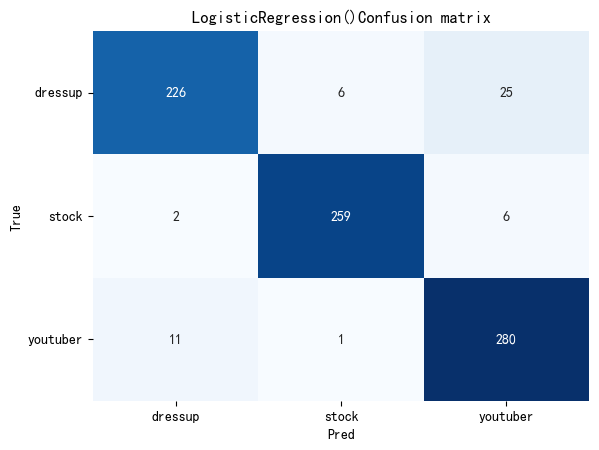

In [170]:
vectorizer = TfidfVectorizer(max_features=1000)
clf = LogisticRegression()
result = train_cv(vectorizer, clf, X_train, y_train)

now training: clf_logistic


              precision    recall  f1-score   support

     dressup       0.95      0.88      0.91       257
       stock       0.97      0.97      0.97       267
    youtuber       0.90      0.96      0.93       292

    accuracy                           0.94       816
   macro avg       0.94      0.94      0.94       816
weighted avg       0.94      0.94      0.94       816

now training: clf_dtree
              precision    recall  f1-score   support

     dressup       0.80      0.82      0.81       257
       stock       0.86      0.90      0.88       267
    youtuber       0.86      0.80      0.83       292

    accuracy                           0.84       816
   macro avg       0.84      0.84      0.84       816
weighted avg       0.84      0.84      0.84       816

now training: clf_svm
              precision    recall  f1-score   support

     dressup       0.95      0.87      0.91       257
       stock       0.98      0.96      0.97       267
    youtuber       0.88      

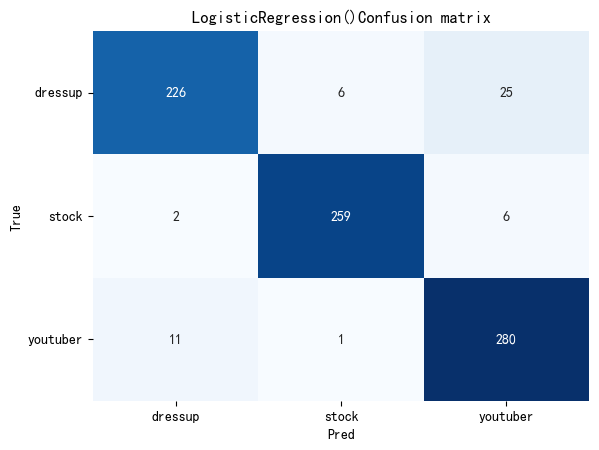

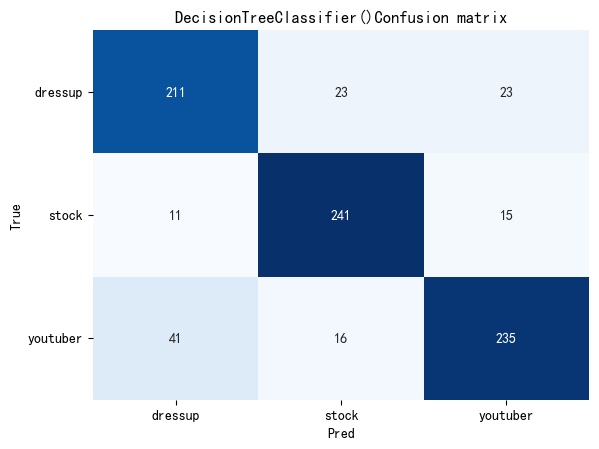

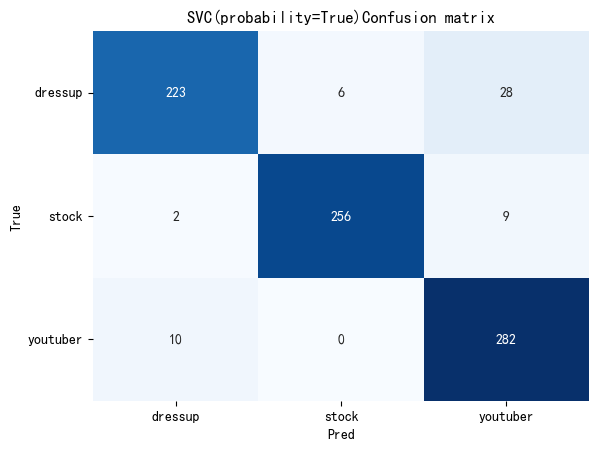

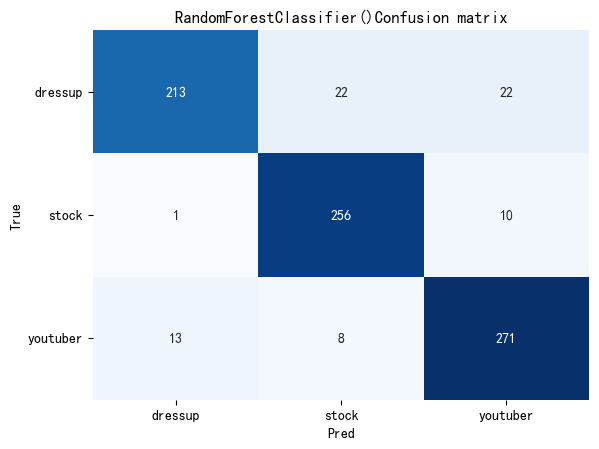

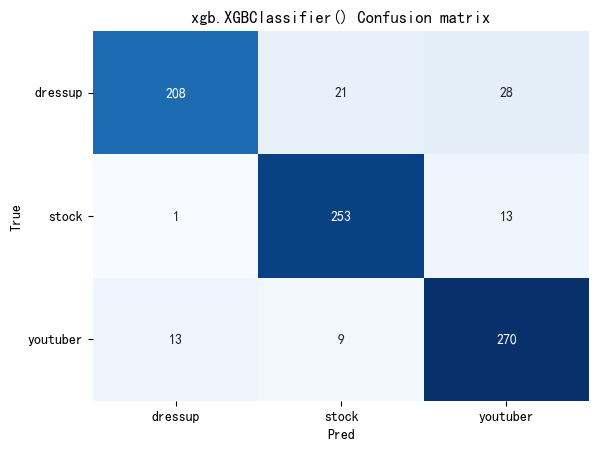

In [171]:
# Ê∫ñÂÇôË®ìÁ∑¥Ë≥áÊñô
X = data["words"]
y = data["boardID"]

# ÊääÊï¥ÂÄãË≥áÊñôÈõÜ‰∏É‰∏âÂàá
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=777
)
# ÂÆöÁæ©Ê®°ÂûãË®ìÁ∑¥ÁµÑÂêà
model_set = dict()
model_set['clf_logistic'] = LogisticRegression()
model_set['clf_dtree'] = DecisionTreeClassifier()
model_set['clf_svm'] = svm.SVC(probability=True) # Ë¶Å‰ΩøÁî®SVMÁöÑpredict_probaÁöÑË©±ÔºåÂøÖÈ†àÂú®Âè´Âá∫SVCÁöÑÊôÇÂÄôÂ∞±Â∞áprobabilityË®≠ÁÇ∫True
model_set['clf_rf'] = RandomForestClassifier()
model_set['clf_xgb'] = xgb.XGBClassifier(objective='multi:softmax', num_class=3, n_estimators=500, seed=3)


# ÂÆöÁæ© vectorizer
# vectorizer = CountVectorizer(max_features=1000)
vectorizer = TfidfVectorizer(max_features=1000)
# Â≠òÁµêÊûú
result_set = dict()

for k, model in model_set.items():
    if k == 'clf_xgb':
        print("="*100)
        print(f"now training: {k}")
        result_set[k] = train_cv_xgb(vectorizer, model, X_train, y_train)
        print("="*100)        
        continue
    else:
        print("="*100)
        print(f"now training: {k}")
        result_set[k] = train_cv(vectorizer, model, X_train, y_train)
        print("="*100)


In [172]:
result_set['clf_logistic']

{'dressup': {'precision': 0.9456066945606695,
  'recall': 0.8793774319066148,
  'f1-score': 0.9112903225806451,
  'support': 257.0},
 'stock': {'precision': 0.9736842105263158,
  'recall': 0.9700374531835206,
  'f1-score': 0.9718574108818011,
  'support': 267.0},
 'youtuber': {'precision': 0.9003215434083601,
  'recall': 0.958904109589041,
  'f1-score': 0.9286898839137645,
  'support': 292.0},
 'accuracy': 0.9375,
 'macro avg': {'precision': 0.9398708161651151,
  'recall': 0.9361063315597254,
  'f1-score': 0.9372792057920702,
  'support': 816.0},
 'weighted avg': {'precision': 0.9385888423870827,
  'recall': 0.9375,
  'f1-score': 0.9373345437640759,
  'support': 816.0}}

In [173]:
max = 0
best_model_name = ""
best_model_metric = "f1-score"

## choose max f1-score model from result_set
for k, v in result_set.items():
    if v['weighted avg'][best_model_metric] > max:
        max = v['weighted avg'][best_model_metric]
        best_model_name = k
print(f"best model: {best_model_name}")
pprint(result_set[best_model_name])

best model: clf_logistic
{'accuracy': 0.9375,
 'dressup': {'f1-score': 0.9112903225806451,
             'precision': 0.9456066945606695,
             'recall': 0.8793774319066148,
             'support': 257.0},
 'macro avg': {'f1-score': 0.9372792057920702,
               'precision': 0.9398708161651151,
               'recall': 0.9361063315597254,
               'support': 816.0},
 'stock': {'f1-score': 0.9718574108818011,
           'precision': 0.9736842105263158,
           'recall': 0.9700374531835206,
           'support': 267.0},
 'weighted avg': {'f1-score': 0.9373345437640759,
                  'precision': 0.9385888423870827,
                  'recall': 0.9375,
                  'support': 816.0},
 'youtuber': {'f1-score': 0.9286898839137645,
              'precision': 0.9003215434083601,
              'recall': 0.958904109589041,
              'support': 292.0}}


In [174]:
y_pred = model_set['clf_logistic'].predict(vectorizer.transform(X_test).toarray())
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     dressup       0.93      0.96      0.95       132
       stock       0.97      0.95      0.96       111
    youtuber       0.94      0.93      0.93       107

    accuracy                           0.95       350
   macro avg       0.95      0.95      0.95       350
weighted avg       0.95      0.95      0.95       350



In [175]:
model_set['clf_logistic'].predict(vectorizer.transform(["Â∏ÇÂ†¥"]).toarray())

array(['stock'], dtype=object)

* ÊúÄ‰Ω≥ÁöÑ model ÁÇ∫ clf_logisticÔºåËÄå Decision Tree Ë∑ü XGBoost ÁöÑË°®ÁèæËºÉÂ∑Æ

## 5. ÂàÜÊûêÂèØËß£ÈáãÊ®°ÂûãÁöÑÁµêÊûú

### 5.1 ÂêÑÂ≠óË©ûÁâπÂæµÁöÑestimate‰øÇÊï∏
Â∞çÊñºÁ∑öÊÄßÁöÑÊ®°ÂûãÔºåÂèØ‰ª•ËóâÁî±Áõ∏Èóú‰øÇÊï∏ÔºåÊü•ÁúãË≥áÊñôÁâπÂæµÔºàË©ûÔºâÂ∞çÊñºÂà§Êñ∑ÂàÜÈ°ûÁöÑÂΩ±Èüø
+ coefficient estimate ‰ª£Ë°®ÁâπÂæµÊØèÂ¢ûÂä†‰∏ÄÂñÆ‰ΩçÔºàÂú®Ê≠§ËôïÊúÉÊòØË©≤ÊñáÁ´†ÁöÑÊüêÂ≠óË©ûÈ†ª +1ÔºâÔºåyÊòØ1ÁöÑÁôºÁîüÊ©üÁéáÊØîyÊòØ0ÁöÑÁôºÁîüÊ©üÁéáÂ§öÂπæÂÄçÔºàodds ratio ÂãùÁÆóÊØîÔºâ
+ ÈÄôË£°Ëàâlogistic regression + cv tokenizer ÁÇ∫‰æã

In [176]:
def plot_coef(logistic_reg_model, feature_names, top_n=10):
    # ÈÅ∏Âá∫ÊüêÂÄãÈ°ûÂà•ÁöÑÂâç10Â§ßÂΩ±ÈüøÂäõÂ≠óË©û
    log_odds = logistic_reg_model.coef_.T
    coef_df = pd.DataFrame(
        log_odds, 
        columns=logistic_reg_model.classes_, index=feature_names
    )
    for label in coef_df.columns:
        select_words = (
            coef_df[[label]]
            .sort_values(by=label, ascending=False)
            .iloc[np.r_[0:top_n, -top_n:0]]
        )
        word = select_words.index
        count = select_words[label]
        category_colors = np.where(
            select_words[label] >= 0, "darkseagreen", "rosybrown"
        )  # Ë®≠ÂÆöÈ°èËâ≤

        fig, ax = plt.subplots(figsize=(8, top_n*0.8))  # Ë®≠ÂÆöÁï´Â∏É
        plt.rcParams["axes.unicode_minus"] = False

        ax.barh(word, count, color=category_colors)
        ax.invert_yaxis()
        ax.set_title(
            "Coeff increase/decrease odds ratio of „Äå" + label + "„Äç label the most",
            loc="left",
            size=16,
        )
        ax.set_ylabel("word", size=14)
        ax.set_xlabel("odds ratio", size=14)

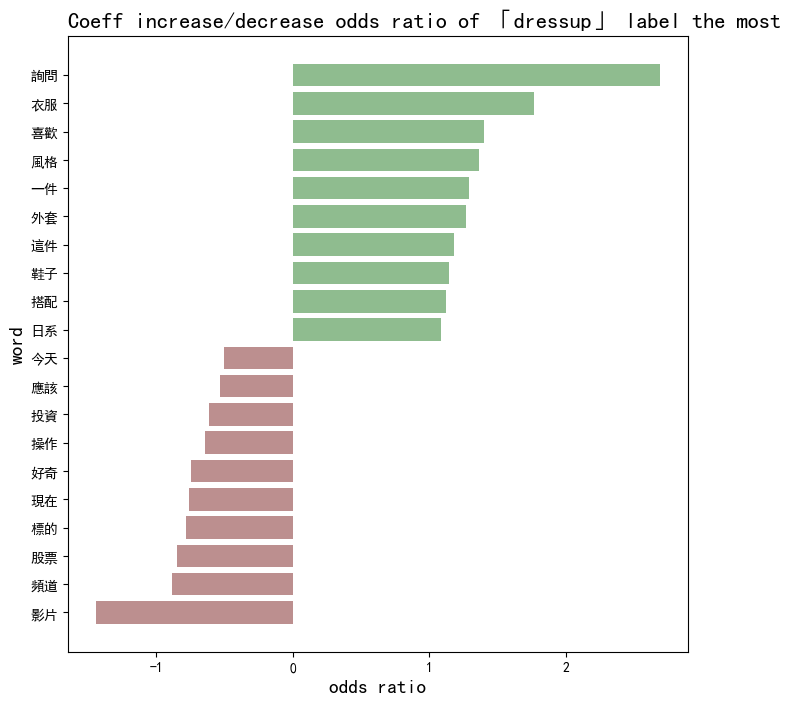

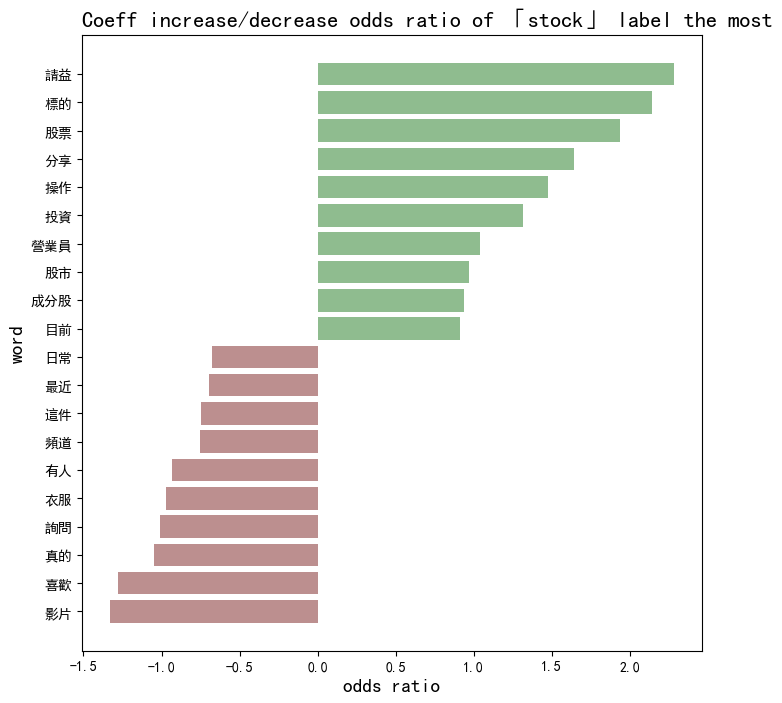

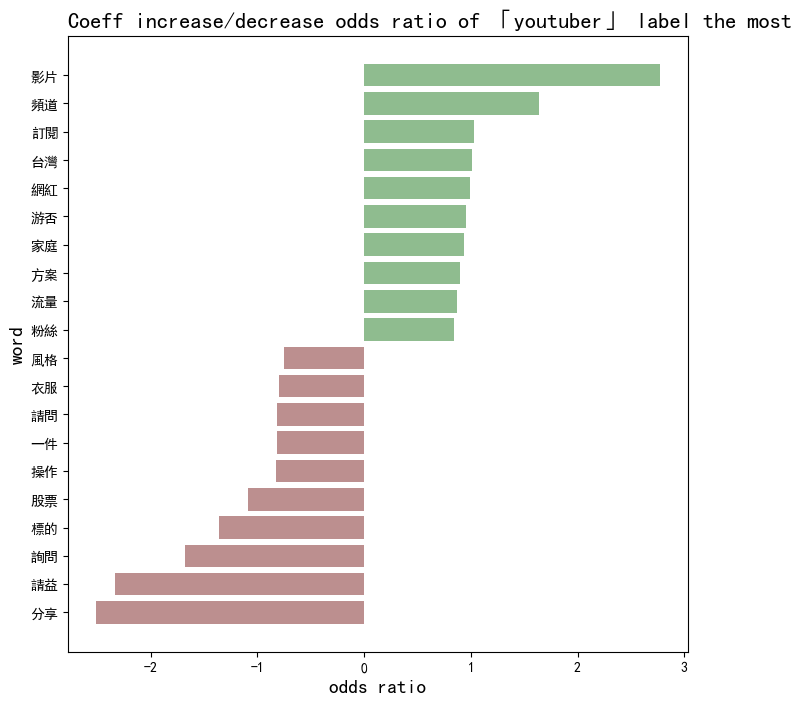

In [177]:
plot_coef(logistic_reg_model=model_set['clf_logistic'], feature_names=vectorizer.get_feature_names_out(), top_n=10)

* Á©øÊê≠Áâà‰∏≠ÂèØ‰ª•ÁúãÂá∫‰æÜË®±Â§ö‰∫∫ÈÉΩÊúÉÊúâÂú®Á©øÊê≠ÁâàË©¢ÂïèË©≤Â¶Ç‰ΩïÊê≠ÈÖç„ÄÅÈ¢®Ê†º‰πãÈ°ûÁöÑ
* ËÇ°Â∏ÇÁâàÂâáÊòØË´ãÁõäÂì™‰∫õÊ®ôÁöÑÁ≠âÁ≠â
* Á∂≤Á¥ÖÊµÅÈáèÁ≠âÂ≠óÁúºÂ∞çÊñºÂàÜÈ°ûYTÁâàÁöÑÂΩ±Èüø‰πüËºÉÂ§ß

## 6. È†êÊ∏¨Êñ∞ËÅûÈ°ûÂà•

`sna2024s_7_a16a93362a_17.csv` 
- ‰æÜÊ∫êÔºöptt
- ÁâàÂà•Ôºöstock
- ÊôÇÈñìÁØÑÂúçÔºö2024/01/01 ~ 2024/04/08
- Â∑•‰ΩúÊµÅÁ®ãÂπ≥Âè∞ÊêúÂ∞ã/ÊéíÈô§ÈóúÈçµÂ≠óÔºöÁÑ°

`sna2024s_7_a16a93362a_20.csv` 
- ‰æÜÊ∫êÔºömobile01
- ÁâàÂà•ÔºöÊôÇÂ∞ö
- ÊôÇÈñìÁØÑÂúçÔºö2024/01/01 ~ 2024/04/08
- Â∑•‰ΩúÊµÅÁ®ãÂπ≥Âè∞ÊêúÂ∞ã/ÊéíÈô§ÈóúÈçµÂ≠óÔºöÁÑ°

`sna2024s_7_a16a93362a_17.csv` 
- ‰æÜÊ∫êÔºödcard
- ÁâàÂà•Ôºöyoutuber
- ÊôÇÈñìÁØÑÂúçÔºö2023/01/01 ~ 2023/03/01
- Â∑•‰ΩúÊµÅÁ®ãÂπ≥Âè∞ÊêúÂ∞ã/ÊéíÈô§ÈóúÈçµÂ≠óÔºöÁÑ°

In [178]:
data1 = pd.read_csv('raw_data/sna2024s_7_a16a93362a_17.csv').head(400)
data2 = pd.read_csv('raw_data/sna2024s_7_a16a93362a_20.csv').head(400)
data3 = pd.read_csv('raw_data/sna2024s_7_a16a93362a_23.csv').head(400)


In [179]:
data1 = data1.rename(columns={'artCatagory': 'boardID'})
data1 = data1.loc[:, ['artTitle', 'artContent', 'artUrl', 'boardID']]


In [180]:
data2['boardID'] = 'ÊôÇÂ∞ö'
data2 = data2.loc[:, ['artTitle', 'artContent', 'artUrl', 'boardID']]


In [181]:
data3 = data3.loc[:, ['artTitle', 'artContent', 'artUrl', 'boardID']]
data3

artTitle  \
0                         #Ë©¢Âïè ÁÇ∫‰ªÄÈ∫ºÊú®ÊõúËßÄÁúãÊï∏ËÆäÂæà‰ΩéÔºü   
1                               toyzÂ±åÊâìÈ§®Èï∑Â∞çÂêß   
2                                  Âª£Âëä‰∏çÁî®Á∂≤Ë∑ØÔºü   
3    ÈóúÊñºÊàëÁöÑÂÆòÂè∏ÔΩú‰∏ÄÂ†¥Â§ßÂûãÁöÑÂè∞ÁÅ£Á§æÊúÉÂØ¶È©óÔΩúÂêÉÁìúÁæ§ÁúæÁúüÁöÑÂú®ÊÑèÁúüÁõ∏ÂóéÔºüÔΩúÊ≥¢ÁâπÁéãÂ•ΩÂ∏•   
4                                VWÂíåMAXÂ•ΩÂÉè‚Ä¶   
..                                     ...   
395                       Ë¢´ÂòéËÄÅÂ∏´ÊèêÂëäÔºåÂÜçË≠∞ÈßÅÂõûÔºàÊúÄÁµÇÂõûÔºâ   
396                          ÊÑõËéâËééËééÁèæÂú®ÊîπËµ∞ÁéâÂ•≥Ë∑ØÁ∑öÔºü   
397                          Â§ßËÉÉÁéã‰∏Å‰∏ÅÂ•ΩÂÉèÂæà‰πÖÊ≤íÁôºÁâá‰∫Ü   
398          MINI VLOG üì∑ ‰∏ÄÂ§©ÊóÖÈÅäÊó•Â∏∏ÔΩúÊ∞∏ÂÆâÊµ∑Ëû∫È§®„ÄÅÊ∑°Ê∞¥ËÄÅË°ó   
399                            ËÆìÁ•®-ÁÇé‰∏äÁéã‰∏ñÂ†ÖÂè∞‰∏≠Â†¥   

                                            artContent  \
0    ÂÖàËÅ≤ÊòéÊ≤íÊúâË¶ÅÂºïÊà∞ ÊòØÁúüÂøÉË©¢Âïè\n‚Äî‚Äî‚Äî\n\n‰∏ÄÁõ¥ÈÉΩÊúâÂú®ÁúãÊú®Êõú\nÂπ≥Â∏∏ÊØîËºÉÂøôÔºåÊòØÂ±¨ÊñºÈÇ£Á®ÆÈñí‰∏ã...   
1    https://www.youtube.com/watch?v=QDKNdVXPotI\n‰∏ç...   
2    https://www.dcard.tw/v2/vivid/videos/e8de9717-...   
3                         https://youtu.be/caBlUFAY1p0   
4    ÂÖàË™™ÊàëÊòØÈÄôÂÖ©ÂÄãÁöÑÁ≤âÁµ≤\nÊàë‰πüÂæàÂñúÊ≠°‰ªñÂÄë\n\nhttps://i.imgur.com/Y4h...   
..                                                 ...   
395  ÂâçÊÉÖÊèêË¶ÅÔºåÈÇÑÊ≤íÁúãÈÅéÂâçÈù¢ÂÖ©ÁØáÁöÑÂèØ‰ª•ÂÖàÂéªÁúã\nhttps://www.dcard.tw/f/yo...   
396  ÁúüÁöÑÊúâ‰∏ÄÈªûÈ´îÊúÉÂà∞Ë¢´ÁÇÆËΩüÊòØ‰ªÄÈ∫ºÊÑüË¶∫‚Ä¶\n‰ΩÜ‰ª•‰∏äÊàëpo ÁöÑÊñáÁ´†ÈÉΩÊòØÂá∫Ëá™ÂΩ±ÁâáÊ≤íÂÜçÂ§öÂä†‰ªÄÈ∫ºÔºåÂ∫ï‰∏ã‰∏ÄÂ†Ü...   
397  ÂÖà‰∏çÁÆ°‰πãÂâç‰ªÄÈ∫ºÂ§ßËÉÉÁéãÈ¢®Ê≥¢\nÂù¶ÁôΩË™™ÊàëÊòØÁúãÊåëÊà∞Âèà‰∏çÊòØ‰∫§ÊúãÂèã\n‰∏çÁÆ°ÊÄéÈ∫ΩË™™\nÊ™ØÈù¢‰∏ä‰∏Å‰∏ÅÊáâË©≤ÊòØÁõÆ...   
398  2023Âπ¥ÁöÑÁ¨¨‰∏ÄÊîØVLOGÂΩ±ÁâáÔºÅÔºÅ\n\nË∂ÅËëóÂÖÉÊó¶ÂÅáÊúüÂéª‰∫ÜÊ∞∏ÂÆâÊºÅÊ∏ØÁöÑÊµ∑Ëû∫È§®Ë∑üÊ∑°Ê∞¥Ëµ∞Ëµ∞\nÊ≤íÊúâ...   
399  1/7 19:45 ÁÇé‰∏äÁéã‰∏ñÂ†Ö Âè∞‰∏≠Áõ¥Êí≠Â†¥\nÂ§ö‰∏ÄÂºµÁ•®‰ª•ÂéüÂÉπ $1000‚ûïÊâãÁ∫åË≤ª$20ÂîÆÂá∫ ...   

                                          artUrl   boardID  
0    https://www.dcard.tw/f/youtuber/p/241101474  youtuber  
1    https://www.dcard.tw/f/youtuber/p/241102266  youtuber  
2    https://www.dcard.tw/f/youtuber/p/241108638  youtuber  
3    https://www.dcard.tw/f/youtuber/p/240928638  youtuber  
4    https://www.dcard.tw/f/youtuber/p/240959705  youtuber  
..                                           ...       ...  
395  https://www.dcard.tw/f/youtuber/p/240930827  youtuber  
396  https://www.dcard.tw/f/youtuber/p/240922536  youtuber  
397  https://www.dcard.tw/f/youtuber/p/240922805  youtuber  
398  https://www.dcard.tw/f/youtuber/p/240935538  youtuber  
399  https://www.dcard.tw/f/youtuber/p/240932720  youtuber  

[400 rows x 4 columns]

In [182]:
# Ê≠•È©ü 3: Âêà‰ΩµË≥áÊñô
test_combined_data = pd.concat([data1, data2, data3])

# Ê≠•È©ü 4: ÂÑ≤Â≠òÂà∞Êñ∞ÁöÑ CSV Ê™îÊ°à
test_combined_data.to_csv('test_data.csv', index=False)

In [183]:
ct = pd.read_csv("test_data.csv")
ct.dropna(inplace=True)
ct

artTitle  \
0                    [ÂøÉÂæó]2023Áü≥Ê≤πÂπ¥Â†±ÂàÜ‰∫´   
1             Re:[Ë´ãÁõä]È´òËÇ°ÊÅØETFËÆäÈ£ÜËÇ°ÊúÉÊòØÂ∏∏ÊÖãÂóé   
2          [Êñ∞ËÅû]‰∏≠ÂúãPMIÈÄ£3ÂÄãÊúàËêéÁ∏ÆÊÅêÈáÄÂ§±Ê•≠Ê∏õËñ™ÊÉ°ÊÄßÂæ™   
3       Re:[Êñ∞ËÅû]‰∏≠ÂúãPMIÈÄ£3ÂÄãÊúàËêéÁ∏ÆÊÅêÈáÄÂ§±Ê•≠Ê∏õËñ™ÊÉ°ÊÄßÂæ™   
4                [Ââµ‰Ωú]ÊµÆÂãïÂú®Ê°åÈù¢‰∏äÁöÑPTTËøΩËπ§Â∑•ÂÖ∑   
...                             ...   
1195               Ë¢´ÂòéËÄÅÂ∏´ÊèêÂëäÔºåÂÜçË≠∞ÈßÅÂõûÔºàÊúÄÁµÇÂõûÔºâ   
1196                  ÊÑõËéâËééËééÁèæÂú®ÊîπËµ∞ÁéâÂ•≥Ë∑ØÁ∑öÔºü   
1197                  Â§ßËÉÉÁéã‰∏Å‰∏ÅÂ•ΩÂÉèÂæà‰πÖÊ≤íÁôºÁâá‰∫Ü   
1198  MINI VLOG üì∑ ‰∏ÄÂ§©ÊóÖÈÅäÊó•Â∏∏ÔΩúÊ∞∏ÂÆâÊµ∑Ëû∫È§®„ÄÅÊ∑°Ê∞¥ËÄÅË°ó   
1199                    ËÆìÁ•®-ÁÇé‰∏äÁéã‰∏ñÂ†ÖÂè∞‰∏≠Â†¥   

                                             artContent  \
0     ÊäïÂÖ•Ë≥áÈáëÁ¥Ñ100Ëê¨Â∑¶Âè≥ÔºåÊâ£ÊéâÈï∑Ê¶ÆËôßÊêçÂæåÊäïÂ†±ÁéáÊòØ45%\n\nÂõ†ÁÇ∫Èï∑Ê¶ÆÊòØ2021Âπ¥Ë≤∑ÁöÑÔºåÁ¥îÁúãÁü≥...   
1     Â∞èÈ≠ØÊàë‰∏çÊòØÈ´òÊâãÔºå‰ªäÂπ¥Ë≥∫‰∏çÂà∞ÂçÉËê¨Ôºå‰ΩÜÂ∞çÈ´òËÇ°ÊÅØETFÈÇÑÁÆóÊúâÈªûÁúãÊ≥ïÔºåÂ∞±ÊèêÂá∫‰æÜÁµ¶‰Ω†ÂèÉËÄÉ‰∏Ä‰∏ã„ÄÇ\n\n...   
2     ÂéüÊñáÊ®ôÈ°åÔºö‰∏≠ÂúãPMIÈÄ£3ÂÄãÊúàËêéÁ∏Æ ÊÅêÈáÄÂ§±Ê•≠Ê∏õËñ™ÊÉ°ÊÄßÂæ™Áí∞\nÂéüÊñáÈÄ£ÁµêÔºö\nhttps://re...   
3     Â§öËôß‰∫ÜÁøíÂ§ßÂ§ßÂ∞çÂêÑË°åÂêÑÊ•≠ÁöÑÂ§ßÂäõÊï¥Êîπ(„Ñâ„ÑöÀá „Ñß„Ñö)\n\n‰∏≠ÂúãÁ∂ìÊøüÂ∞áËøé‰æÜ‰∏≠ÂÖ±Âü∑Êîø‰ª•‰æÜÊúÄÂ§ßÁöÑ"È´ò...   
4     ÁÇ∫‰∫ÜÂèØ‰ª•Èö®ÊôÇÁúãÂç≥ÊôÇÊé®Êñá\n\nÊâÄ‰ª•ÂØ´‰∫Ü‰∏ÄÂÄãÂèØ‰ª•ÁΩÆÈ†Ç‰∏¶Èö±ËóèÂú®Ê°åÈù¢ÂêÑÂÄãËßíËêΩÁúã PTT ÁöÑÂ∞èÁ®ãÂºè\...   
...                                                 ...   
1195  ÂâçÊÉÖÊèêË¶ÅÔºåÈÇÑÊ≤íÁúãÈÅéÂâçÈù¢ÂÖ©ÁØáÁöÑÂèØ‰ª•ÂÖàÂéªÁúã\nhttps://www.dcard.tw/f/yo...   
1196  ÁúüÁöÑÊúâ‰∏ÄÈªûÈ´îÊúÉÂà∞Ë¢´ÁÇÆËΩüÊòØ‰ªÄÈ∫ºÊÑüË¶∫‚Ä¶\n‰ΩÜ‰ª•‰∏äÊàëpo ÁöÑÊñáÁ´†ÈÉΩÊòØÂá∫Ëá™ÂΩ±ÁâáÊ≤íÂÜçÂ§öÂä†‰ªÄÈ∫ºÔºåÂ∫ï‰∏ã‰∏ÄÂ†Ü...   
1197  ÂÖà‰∏çÁÆ°‰πãÂâç‰ªÄÈ∫ºÂ§ßËÉÉÁéãÈ¢®Ê≥¢\nÂù¶ÁôΩË™™ÊàëÊòØÁúãÊåëÊà∞Âèà‰∏çÊòØ‰∫§ÊúãÂèã\n‰∏çÁÆ°ÊÄéÈ∫ΩË™™\nÊ™ØÈù¢‰∏ä‰∏Å‰∏ÅÊáâË©≤ÊòØÁõÆ...   
1198  2023Âπ¥ÁöÑÁ¨¨‰∏ÄÊîØVLOGÂΩ±ÁâáÔºÅÔºÅ\n\nË∂ÅËëóÂÖÉÊó¶ÂÅáÊúüÂéª‰∫ÜÊ∞∏ÂÆâÊºÅÊ∏ØÁöÑÊµ∑Ëû∫È§®Ë∑üÊ∑°Ê∞¥Ëµ∞Ëµ∞\nÊ≤íÊúâ...   
1199  1/7 19:45 ÁÇé‰∏äÁéã‰∏ñÂ†Ö Âè∞‰∏≠Áõ¥Êí≠Â†¥\nÂ§ö‰∏ÄÂºµÁ•®‰ª•ÂéüÂÉπ $1000‚ûïÊâãÁ∫åË≤ª$20ÂîÆÂá∫ ...   

                                                 artUrl   boardID  
0     https://www.ptt.cc/bbs/Stock/M.1704072007.A.D8...     Stock  
1     https://www.ptt.cc/bbs/Stock/M.1704075405.A.1C...     Stock  
2     https://www.ptt.cc/bbs/Stock/M.1704084710.A.FF...     Stock  
3     https://www.ptt.cc/bbs/Stock/M.1704088308.A.59...     Stock  
4     https://www.ptt.cc/bbs/Stock/M.1704094303.A.A5...     Stock  
...                                                 ...       ...  
1195        https://www.dcard.tw/f/youtuber/p/240930827  youtuber  
1196        https://www.dcard.tw/f/youtuber/p/240922536  youtuber  
1197        https://www.dcard.tw/f/youtuber/p/240922805  youtuber  
1198        https://www.dcard.tw/f/youtuber/p/240935538  youtuber  
1199        https://www.dcard.tw/f/youtuber/p/240932720  youtuber  

[1197 rows x 4 columns]

In [184]:
# ÁßªÈô§Á∂≤ÂùÄÊ†ºÂºè
ct["artContent"].str.replace("(http|https)://.*", "", regex=True)
ct["artTitle"].str.replace("(http|https)://.*", "", regex=True)
ct["artContent"].str.replace("[^\u4e00-\u9fa5]+", "", regex=True)
ct["artTitle"].str.replace("[^\u4e00-\u9fa5]+", "", regex=True)

# Áïô‰∏ã content
ct["content"] = ct["artTitle"] + ct["artContent"]
ct = ct.loc[:,["content", "artUrl", "boardID"]]  # ÊñáÁ´†ÂÖßÂÆπ ÊñáÁ´†ÈÄ£Áµê

# Ë®≠ÂÆöÊñ∑Ë©û function
def getToken(row):
    seg_list = jieba.cut(row, cut_all=False)
    seg_list = [
        w for w in seg_list if w not in stopWords and len(w) > 1
    ]  # ÁØ©ÈÅ∏ÊéâÂÅúÁî®Â≠óËàáÂ≠óÂÖÉÊï∏Â§ßÊñº1ÁöÑË©ûÂΩô
    return seg_list

ct["words"] = ct["content"].apply(getToken).map(" ".join)
ct.head()

content  \
0  [ÂøÉÂæó]2023Áü≥Ê≤πÂπ¥Â†±ÂàÜ‰∫´ÊäïÂÖ•Ë≥áÈáëÁ¥Ñ100Ëê¨Â∑¶Âè≥ÔºåÊâ£ÊéâÈï∑Ê¶ÆËôßÊêçÂæåÊäïÂ†±ÁéáÊòØ45%\n\nÂõ†ÁÇ∫...   
1  Re:[Ë´ãÁõä]È´òËÇ°ÊÅØETFËÆäÈ£ÜËÇ°ÊúÉÊòØÂ∏∏ÊÖãÂóéÂ∞èÈ≠ØÊàë‰∏çÊòØÈ´òÊâãÔºå‰ªäÂπ¥Ë≥∫‰∏çÂà∞ÂçÉËê¨Ôºå‰ΩÜÂ∞çÈ´òËÇ°ÊÅØETFÈÇÑ...   
2  [Êñ∞ËÅû]‰∏≠ÂúãPMIÈÄ£3ÂÄãÊúàËêéÁ∏ÆÊÅêÈáÄÂ§±Ê•≠Ê∏õËñ™ÊÉ°ÊÄßÂæ™ÂéüÊñáÊ®ôÈ°åÔºö‰∏≠ÂúãPMIÈÄ£3ÂÄãÊúàËêéÁ∏Æ ÊÅêÈáÄÂ§±Ê•≠Ê∏õ...   
3  Re:[Êñ∞ËÅû]‰∏≠ÂúãPMIÈÄ£3ÂÄãÊúàËêéÁ∏ÆÊÅêÈáÄÂ§±Ê•≠Ê∏õËñ™ÊÉ°ÊÄßÂæ™Â§öËôß‰∫ÜÁøíÂ§ßÂ§ßÂ∞çÂêÑË°åÂêÑÊ•≠ÁöÑÂ§ßÂäõÊï¥Êîπ(„Ñâ„Ñö...   
4  [Ââµ‰Ωú]ÊµÆÂãïÂú®Ê°åÈù¢‰∏äÁöÑPTTËøΩËπ§Â∑•ÂÖ∑ÁÇ∫‰∫ÜÂèØ‰ª•Èö®ÊôÇÁúãÂç≥ÊôÇÊé®Êñá\n\nÊâÄ‰ª•ÂØ´‰∫Ü‰∏ÄÂÄãÂèØ‰ª•ÁΩÆÈ†Ç‰∏¶Èö±Ëóè...   

                                              artUrl boardID  \
0  https://www.ptt.cc/bbs/Stock/M.1704072007.A.D8...   Stock   
1  https://www.ptt.cc/bbs/Stock/M.1704075405.A.1C...   Stock   
2  https://www.ptt.cc/bbs/Stock/M.1704084710.A.FF...   Stock   
3  https://www.ptt.cc/bbs/Stock/M.1704088308.A.59...   Stock   
4  https://www.ptt.cc/bbs/Stock/M.1704094303.A.A5...   Stock   

                                               words  
0  ÂøÉÂæó 2023 Áü≥Ê≤π Âπ¥Â†± ÂàÜ‰∫´ ÊäïÂÖ• Ë≥áÈáë 100 Ëê¨Â∑¶Âè≥ Êâ£Êéâ Èï∑Ê¶Æ ËôßÊêç ÊäïÂ†± 45%...  
1  Re Ë´ãÁõä ËÇ°ÊÅØ ETF ËÆäÈ£Ü ËÇ°ÊúÉ Â∏∏ÊÖã Â∞èÈ≠Ø È´òÊâã ‰ªäÂπ¥ ‰∏çÂà∞ ËÇ°ÊÅØ ETF ÈÇÑÁÆó ÊúâÈªû...  
2  Êñ∞ËÅû ‰∏≠Âúã PMI ËêéÁ∏Æ ÊÅêÈáÄ Â§±Ê•≠ Ê∏õËñ™ ÊÉ°ÊÄß ÂéüÊñá Ê®ôÈ°å ‰∏≠Âúã PMI ËêéÁ∏Æ ÊÅêÈáÄ Â§±Ê•≠...  
3  Re Êñ∞ËÅû ‰∏≠Âúã PMI ËêéÁ∏Æ ÊÅêÈáÄ Â§±Ê•≠ Ê∏õËñ™ ÊÉ°ÊÄß ÂêÑË°åÂêÑÊ•≠ Â§ßÂäõ Êï¥Êîπ ‰∏≠Âúã Á∂ìÊøü Ëøé...  
4  Ââµ‰Ωú ÊµÆÂãï Ê°åÈù¢‰∏ä PTT ËøΩËπ§ Â∑•ÂÖ∑ Èö®ÊôÇ Âç≥ÊôÇ Êé®Êñá ÁΩÆÈ†Ç Èö±Ëóè Ê°åÈù¢ ËßíËêΩ PTT Á®ã...

In [185]:
ct['boardID'].value_counts()

boardID
youtuber    400
Stock       399
ÊôÇÂ∞ö          398
Name: count, dtype: int64

In [186]:
ct

content  \
0     [ÂøÉÂæó]2023Áü≥Ê≤πÂπ¥Â†±ÂàÜ‰∫´ÊäïÂÖ•Ë≥áÈáëÁ¥Ñ100Ëê¨Â∑¶Âè≥ÔºåÊâ£ÊéâÈï∑Ê¶ÆËôßÊêçÂæåÊäïÂ†±ÁéáÊòØ45%\n\nÂõ†ÁÇ∫...   
1     Re:[Ë´ãÁõä]È´òËÇ°ÊÅØETFËÆäÈ£ÜËÇ°ÊúÉÊòØÂ∏∏ÊÖãÂóéÂ∞èÈ≠ØÊàë‰∏çÊòØÈ´òÊâãÔºå‰ªäÂπ¥Ë≥∫‰∏çÂà∞ÂçÉËê¨Ôºå‰ΩÜÂ∞çÈ´òËÇ°ÊÅØETFÈÇÑ...   
2     [Êñ∞ËÅû]‰∏≠ÂúãPMIÈÄ£3ÂÄãÊúàËêéÁ∏ÆÊÅêÈáÄÂ§±Ê•≠Ê∏õËñ™ÊÉ°ÊÄßÂæ™ÂéüÊñáÊ®ôÈ°åÔºö‰∏≠ÂúãPMIÈÄ£3ÂÄãÊúàËêéÁ∏Æ ÊÅêÈáÄÂ§±Ê•≠Ê∏õ...   
3     Re:[Êñ∞ËÅû]‰∏≠ÂúãPMIÈÄ£3ÂÄãÊúàËêéÁ∏ÆÊÅêÈáÄÂ§±Ê•≠Ê∏õËñ™ÊÉ°ÊÄßÂæ™Â§öËôß‰∫ÜÁøíÂ§ßÂ§ßÂ∞çÂêÑË°åÂêÑÊ•≠ÁöÑÂ§ßÂäõÊï¥Êîπ(„Ñâ„Ñö...   
4     [Ââµ‰Ωú]ÊµÆÂãïÂú®Ê°åÈù¢‰∏äÁöÑPTTËøΩËπ§Â∑•ÂÖ∑ÁÇ∫‰∫ÜÂèØ‰ª•Èö®ÊôÇÁúãÂç≥ÊôÇÊé®Êñá\n\nÊâÄ‰ª•ÂØ´‰∫Ü‰∏ÄÂÄãÂèØ‰ª•ÁΩÆÈ†Ç‰∏¶Èö±Ëóè...   
...                                                 ...   
1195  Ë¢´ÂòéËÄÅÂ∏´ÊèêÂëäÔºåÂÜçË≠∞ÈßÅÂõûÔºàÊúÄÁµÇÂõûÔºâÂâçÊÉÖÊèêË¶ÅÔºåÈÇÑÊ≤íÁúãÈÅéÂâçÈù¢ÂÖ©ÁØáÁöÑÂèØ‰ª•ÂÖàÂéªÁúã\nhttps://w...   
1196  ÊÑõËéâËééËééÁèæÂú®ÊîπËµ∞ÁéâÂ•≥Ë∑ØÁ∑öÔºüÁúüÁöÑÊúâ‰∏ÄÈªûÈ´îÊúÉÂà∞Ë¢´ÁÇÆËΩüÊòØ‰ªÄÈ∫ºÊÑüË¶∫‚Ä¶\n‰ΩÜ‰ª•‰∏äÊàëpo ÁöÑÊñáÁ´†ÈÉΩÊòØÂá∫Ëá™...   
1197  Â§ßËÉÉÁéã‰∏Å‰∏ÅÂ•ΩÂÉèÂæà‰πÖÊ≤íÁôºÁâá‰∫ÜÂÖà‰∏çÁÆ°‰πãÂâç‰ªÄÈ∫ºÂ§ßËÉÉÁéãÈ¢®Ê≥¢\nÂù¶ÁôΩË™™ÊàëÊòØÁúãÊåëÊà∞Âèà‰∏çÊòØ‰∫§ÊúãÂèã\n‰∏çÁÆ°ÊÄé...   
1198  MINI VLOG üì∑ ‰∏ÄÂ§©ÊóÖÈÅäÊó•Â∏∏ÔΩúÊ∞∏ÂÆâÊµ∑Ëû∫È§®„ÄÅÊ∑°Ê∞¥ËÄÅË°ó2023Âπ¥ÁöÑÁ¨¨‰∏ÄÊîØVLOGÂΩ±ÁâáÔºÅÔºÅ...   
1199  ËÆìÁ•®-ÁÇé‰∏äÁéã‰∏ñÂ†ÖÂè∞‰∏≠Â†¥1/7 19:45 ÁÇé‰∏äÁéã‰∏ñÂ†Ö Âè∞‰∏≠Áõ¥Êí≠Â†¥\nÂ§ö‰∏ÄÂºµÁ•®‰ª•ÂéüÂÉπ $100...   

                                                 artUrl   boardID  \
0     https://www.ptt.cc/bbs/Stock/M.1704072007.A.D8...     Stock   
1     https://www.ptt.cc/bbs/Stock/M.1704075405.A.1C...     Stock   
2     https://www.ptt.cc/bbs/Stock/M.1704084710.A.FF...     Stock   
3     https://www.ptt.cc/bbs/Stock/M.1704088308.A.59...     Stock   
4     https://www.ptt.cc/bbs/Stock/M.1704094303.A.A5...     Stock   
...                                                 ...       ...   
1195        https://www.dcard.tw/f/youtuber/p/240930827  youtuber   
1196        https://www.dcard.tw/f/youtuber/p/240922536  youtuber   
1197        https://www.dcard.tw/f/youtuber/p/240922805  youtuber   
1198        https://www.dcard.tw/f/youtuber/p/240935538  youtuber   
1199        https://www.dcard.tw/f/youtuber/p/240932720  youtuber   

                                                  words  
0     ÂøÉÂæó 2023 Áü≥Ê≤π Âπ¥Â†± ÂàÜ‰∫´ ÊäïÂÖ• Ë≥áÈáë 100 Ëê¨Â∑¶Âè≥ Êâ£Êéâ Èï∑Ê¶Æ ËôßÊêç ÊäïÂ†± 45%...  
1     Re Ë´ãÁõä ËÇ°ÊÅØ ETF ËÆäÈ£Ü ËÇ°ÊúÉ Â∏∏ÊÖã Â∞èÈ≠Ø È´òÊâã ‰ªäÂπ¥ ‰∏çÂà∞ ËÇ°ÊÅØ ETF ÈÇÑÁÆó ÊúâÈªû...  
2     Êñ∞ËÅû ‰∏≠Âúã PMI ËêéÁ∏Æ ÊÅêÈáÄ Â§±Ê•≠ Ê∏õËñ™ ÊÉ°ÊÄß ÂéüÊñá Ê®ôÈ°å ‰∏≠Âúã PMI ËêéÁ∏Æ ÊÅêÈáÄ Â§±Ê•≠...  
3     Re Êñ∞ËÅû ‰∏≠Âúã PMI ËêéÁ∏Æ ÊÅêÈáÄ Â§±Ê•≠ Ê∏õËñ™ ÊÉ°ÊÄß ÂêÑË°åÂêÑÊ•≠ Â§ßÂäõ Êï¥Êîπ ‰∏≠Âúã Á∂ìÊøü Ëøé...  
4     Ââµ‰Ωú ÊµÆÂãï Ê°åÈù¢‰∏ä PTT ËøΩËπ§ Â∑•ÂÖ∑ Èö®ÊôÇ Âç≥ÊôÇ Êé®Êñá ÁΩÆÈ†Ç Èö±Ëóè Ê°åÈù¢ ËßíËêΩ PTT Á®ã...  
...                                                 ...  
1195  ËÄÅÂ∏´ ÊèêÂëä ÂÜçË≠∞ ÈßÅÂõû ÊúÄÁµÇ ÊèêË¶Å ÈÇÑÊ≤í ÁúãÈÅé ÂâçÈù¢ ÂÖ©ÁØá ÂÖàÂéª https www dca...  
1196  ÊÑõËéâËééËéé ÁèæÂú® ÊîπËµ∞ ÁéâÂ•≥ Ë∑ØÁ∑ö ÁúüÁöÑ ‰∏ÄÈªû È´îÊúÉ ÁÇÆËΩü ÊÑüË¶∫ ‰ª•‰∏ä po ÊñáÁ´† Âá∫Ëá™ ÂΩ±Áâá...  
1197  Â§ßËÉÉ ‰∏Å‰∏Å Â•ΩÂÉè Âæà‰πÖÊ≤í ÁôºÁâá ‰πãÂâç Â§ßËÉÉ È¢®Ê≥¢ Âù¶ÁôΩË™™ ÊåëÊà∞ ‰∫§ÊúãÂèã Ê™ØÈù¢ ‰∏Å‰∏Å ÊáâË©≤ ÁõÆ...  
1198  MINI VLOG ‰∏ÄÂ§© ÊóÖÈÅä Êó•Â∏∏ Ê∞∏ÂÆâ Êµ∑Ëû∫ Ê∑°Ê∞¥ ËÄÅË°ó 2023 Á¨¨‰∏ÄÊîØ VLOG ÂΩ±...  
1199  ÁÇé‰∏ä Áéã‰∏ñ Â†ÖÂè∞ ‰∏≠Â†¥ 19 45 ÁÇé‰∏ä Áéã‰∏ñÂ†Ö Áõ¥Êí≠ ‰∏ÄÂºµ Á•®‰ª• ÂéüÂÉπ 1000 ÊâãÁ∫åË≤ª ...  

[1197 rows x 4 columns]

              precision    recall  f1-score   support

     dressup       0.92      0.54      0.68       398
       stock       0.93      0.85      0.89       399
    youtuber       0.62      0.94      0.75       400

    accuracy                           0.77      1197
   macro avg       0.82      0.77      0.77      1197
weighted avg       0.82      0.77      0.77      1197



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'dressup'), Text(0, 1.5, 'stock'), Text(0, 2.5, 'youtuber')])

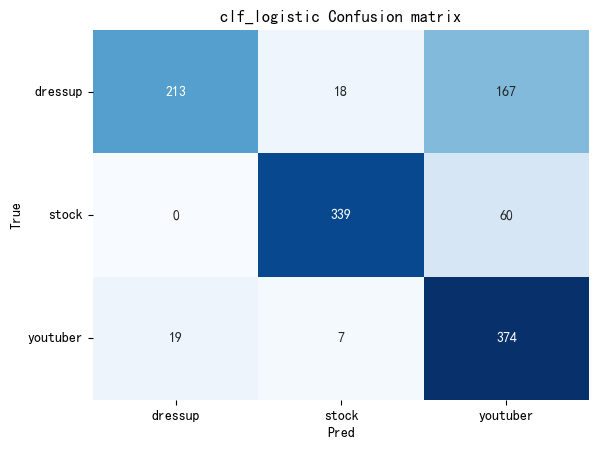

In [187]:
mapper = {"Stock":"stock", "ÊôÇÂ∞ö":"dressup", "youtuber":"youtuber"}
ct['boardID'] = ct['boardID'].map(mapper)

X = ct['words']
y = ct['boardID']

y_pred = model_set[best_model_name].predict(vectorizer.transform(X).toarray())
print(classification_report(y, y_pred))

    ## Plot confusion matrix
cm = confusion_matrix(y, y_pred, labels=classes)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(
    xlabel="Pred",
    ylabel="True",
    xticklabels=classes,
    yticklabels=classes,
    title=f"{best_model_name}" + " Confusion matrix",
)
plt.yticks(rotation=0)


### ÂæÆÂ¶ôÁôºÁèæ
Âæû‰∏äÈù¢ÁöÑÁµêÊûú‰∏çÈõ£ÁúãÂá∫ÔºåÂú®ÁúüÂØ¶Á©øÊê≠ÁâàÁöÑË≥áÊñôÂàÜÈ°ûÁÇ∫youtuberÁâàÁöÑÊÉÖÊ≥ÅÁõ∏Â∞çËºÉÁÇ∫È†ªÁπÅÔºåÈÄôÈÇäÂêàÁêÜÁåúÊ∏¨ÈÉ®ÂàÜÁ©øÊê≠Áâà‰∏äÁöÑË≥áÊñôÊàñÂ§öÊàñÂ∞ëË∑üyoutuberÊúâÊâÄÁõ∏ÈóúÔºå‰ΩøÂæóÂàÜÈ°ûÁ©øÊê≠ÁâàÊôÇÊúâÊâÄÊ∑∑Ê∑Ü„ÄÇ

In [188]:
ct['pred'] = y_pred
ct.loc[:,['words', 'boardID',"pred"]]

words   boardID      pred
0     ÂøÉÂæó 2023 Áü≥Ê≤π Âπ¥Â†± ÂàÜ‰∫´ ÊäïÂÖ• Ë≥áÈáë 100 Ëê¨Â∑¶Âè≥ Êâ£Êéâ Èï∑Ê¶Æ ËôßÊêç ÊäïÂ†± 45%...     stock     stock
1     Re Ë´ãÁõä ËÇ°ÊÅØ ETF ËÆäÈ£Ü ËÇ°ÊúÉ Â∏∏ÊÖã Â∞èÈ≠Ø È´òÊâã ‰ªäÂπ¥ ‰∏çÂà∞ ËÇ°ÊÅØ ETF ÈÇÑÁÆó ÊúâÈªû...     stock     stock
2     Êñ∞ËÅû ‰∏≠Âúã PMI ËêéÁ∏Æ ÊÅêÈáÄ Â§±Ê•≠ Ê∏õËñ™ ÊÉ°ÊÄß ÂéüÊñá Ê®ôÈ°å ‰∏≠Âúã PMI ËêéÁ∏Æ ÊÅêÈáÄ Â§±Ê•≠...     stock     stock
3     Re Êñ∞ËÅû ‰∏≠Âúã PMI ËêéÁ∏Æ ÊÅêÈáÄ Â§±Ê•≠ Ê∏õËñ™ ÊÉ°ÊÄß ÂêÑË°åÂêÑÊ•≠ Â§ßÂäõ Êï¥Êîπ ‰∏≠Âúã Á∂ìÊøü Ëøé...     stock  youtuber
4     Ââµ‰Ωú ÊµÆÂãï Ê°åÈù¢‰∏ä PTT ËøΩËπ§ Â∑•ÂÖ∑ Èö®ÊôÇ Âç≥ÊôÇ Êé®Êñá ÁΩÆÈ†Ç Èö±Ëóè Ê°åÈù¢ ËßíËêΩ PTT Á®ã...     stock     stock
...                                                 ...       ...       ...
1195  ËÄÅÂ∏´ ÊèêÂëä ÂÜçË≠∞ ÈßÅÂõû ÊúÄÁµÇ ÊèêË¶Å ÈÇÑÊ≤í ÁúãÈÅé ÂâçÈù¢ ÂÖ©ÁØá ÂÖàÂéª https www dca...  youtuber  youtuber
1196  ÊÑõËéâËééËéé ÁèæÂú® ÊîπËµ∞ ÁéâÂ•≥ Ë∑ØÁ∑ö ÁúüÁöÑ ‰∏ÄÈªû È´îÊúÉ ÁÇÆËΩü ÊÑüË¶∫ ‰ª•‰∏ä po ÊñáÁ´† Âá∫Ëá™ ÂΩ±Áâá...  youtuber  youtuber
1197  Â§ßËÉÉ ‰∏Å‰∏Å Â•ΩÂÉè Âæà‰πÖÊ≤í ÁôºÁâá ‰πãÂâç Â§ßËÉÉ È¢®Ê≥¢ Âù¶ÁôΩË™™ ÊåëÊà∞ ‰∫§ÊúãÂèã Ê™ØÈù¢ ‰∏Å‰∏Å ÊáâË©≤ ÁõÆ...  youtuber  youtuber
1198  MINI VLOG ‰∏ÄÂ§© ÊóÖÈÅä Êó•Â∏∏ Ê∞∏ÂÆâ Êµ∑Ëû∫ Ê∑°Ê∞¥ ËÄÅË°ó 2023 Á¨¨‰∏ÄÊîØ VLOG ÂΩ±...  youtuber  youtuber
1199  ÁÇé‰∏ä Áéã‰∏ñ Â†ÖÂè∞ ‰∏≠Â†¥ 19 45 ÁÇé‰∏ä Áéã‰∏ñÂ†Ö Áõ¥Êí≠ ‰∏ÄÂºµ Á•®‰ª• ÂéüÂÉπ 1000 ÊâãÁ∫åË≤ª ...  youtuber  youtuber

[1197 rows x 3 columns]

In [189]:
false_pred = ct.query("boardID != pred").loc[:,['words', 'boardID',"pred"]]
false_pred

words   boardID      pred
3     Re Êñ∞ËÅû ‰∏≠Âúã PMI ËêéÁ∏Æ ÊÅêÈáÄ Â§±Ê•≠ Ê∏õËñ™ ÊÉ°ÊÄß ÂêÑË°åÂêÑÊ•≠ Â§ßÂäõ Êï¥Êîπ ‰∏≠Âúã Á∂ìÊøü Ëøé...     stock  youtuber
5     Êñ∞ËÅû Êó•Êú¨ Áü≥Â∑ù 7.6 Âº∑Èúá ÊúÄÂ§ß ÈúáÂ∫¶ Ê∞£Ë±°Âª≥ ÂéüÊñá Ê®ôÈ°å Êó•Êú¨ Áü≥Â∑ù 7.6 Âº∑Èúá ÊúÄ...     stock  youtuber
15    ÂøÉÂæó ËÇ°Áâà vs ÊàøÁâà ÈÅéÂéª ÂÖ©Âπ¥ Á¥ØË®à ÊàøÂÉπ Êº≤ÂπÖ ÊàøÁ∂≤ ÊàøÂÉπ Áµ±Ë®à 202312 Â∞çÊØî ...     stock  youtuber
31    Êñ∞ËÅû ÁæéÂúã Êñ∞Ë¶è ÁîüÊïà Â§öÊ¨æ ÈõªÂãïËªä Â§±Âéª Á®ÖÊî∂ ÊäµÂÖç Ë≥áÊ†º ÂéüÊñá Ê®ôÈ°å ÁæéÂúã ÈõªÊ±† Êé°Ë≥º ...     stock  youtuber
35    Re ÂøÉÂæó ËÇ°Áâà vs ÊàøÁâà ÊàøÊùø ÂçÅÂπæÂπ¥ ÊàøÁâà ‰∏ÄÁ®Æ ËÇ°Áâà ÂÆåÂÖ® ÁâπÊÄß ÊàøÁâà ÁúüÊ≠£ Ë∂ÖÊúâ ...     stock  youtuber
...                                                 ...       ...       ...
1082      Êé®Ëñ¶ youtuber Ë´ãÂïè ‰∏Ä‰∏ã ÊúâÊ≤íÊúâ Âπ≥Â∏∏ Êé®Ëñ¶ YouTuber ÈÅãÂãï ÂêÉÊí≠ ÊÑüË¨ù  youtuber   dressup
1097  ËâæËéâËééËéé Ë≤∑Êàø Á≥ªÂàó ËâæËéâËééËéé Ë£ùÊΩ¢ Âå†Ê∞£ Ë©ïË´ñ È¢®Ê†º ÂâõÂâõ Áôº‰∫Ü ‰ª•‰∏ã ÊñáÁ´† Â∫ï‰∏ã ÈÖ∏Ê∞ë ...  youtuber   dressup
1101  Ë¶∫Âæó ËâæËéâËééËéé Êñ∞ÂÆ∂ È¢®Ê†º https imgur com l3Z9UhO jpg http...  youtuber   dressup
1156  ÂãæÊÉ° Âπ´‰∏ª ÂàÜ‰∫´ Âè∞Âçó Ë≠∞ÊúÉ ÈªëÈáë Ë≥ÑÈÅ∏ ÂÖßÂπï ÁúüÁöÑ ÁúãÂêß https www youtub...  youtuber   dressup
1181             Re Ëë£‰∫ãÈï∑ ÈÑ≠ÈõÖÂãª ÁØáÊñáÁ´† ËΩâË≤º ÊñáÁ´† Êõ¥Êñ∞ ÊúÄÊñ∞ ÁâàÊú¨ ËßÄÁúã ÂÆåÊï¥ ÂÖßÂÆπ  youtuber   dressup

[271 rows x 3 columns]

In [190]:



false_pred.loc[false_pred['boardID']=='youtuber', :].head(50)

words   boardID     pred
808   YT premium ÊπäÂúò Ë¢´Âà™ ÂóöÂóö Âä†ÈÄ≤‰æÜ ‰∫îÂêç ÁõÆÂâç ÂÖ©‰Ωç https line me...  youtuber    stock
822   MyBagLand EP.7 Á¨¨‰∏ÄÈ°Ü COACH Â∞àÊ´É ÂåÖÂåÖ ÈñãÁÆ± Bag Unboxing...  youtuber  dressup
832              2023 ÈòøÂòü ‰πãÂ§ú Â∏ÉËêäÂÖã ËñõËñõ Êó∫ÂÖî È†ÜÂà© ËÅØÊ≠° Ê¥æÂ∞ç ‰πãÂæå Ëá®ÊôÇ ËÆìÁµ¶  youtuber    stock
845   ËâæËéâËééËéé Ë≤∑Êàø Á≥ªÂàó ÊåÅÁ∫å Êõ¥Êñ∞ Ë≤∑Êàø Á≥ªÂàó ÊåÅÁ∫å Êõ¥Êñ∞ ‰∏≠Âõ† ÈªûË™™ ÂØ¶Âú®Ë©± Á¨¨‰∏Ä Â§ßËæ£Ëæ£ ...  youtuber  dressup
847   ËâæËéâËééËéé Ë≤∑Êàø Á≥ªÂàó ÊåÅÁ∫å Êõ¥Êñ∞ Ë≤∑Êàø Á≥ªÂàó ÊåÅÁ∫å Êõ¥Êñ∞ ‰∏≠Âõ† ÈªûË™™ ÂØ¶Âú®Ë©± Á¨¨‰∏Ä Â§ßËæ£Ëæ£ ...  youtuber  dressup
864                   ÈÄôÊòØ VW ÁØáÊñáÁ´† ËΩâË≤º ÊñáÁ´† Êõ¥Êñ∞ ÊúÄÊñ∞ ÁâàÊú¨ ËßÄÁúã ÂÆåÊï¥ ÂÖßÂÆπ  youtuber  dressup
866   Ëî°ÈòøÂòé Ê≠êÈôΩ Â¶ÆÂ¶Æ ÂêåÊ°Ü https imgur com ToJ0rQi jpg https...  youtuber  dressup
880   Âæ∑Â∑û ÂÖ¨Ë∑Ø ÊóÖË°å VLOG Austin San Antonio Road Trip Moz...  youtuber    stock
883           ÈªÉÈáë ÂÇëÊ¥õ Êà∞È¨• ÂàÜ‰∫´ ËΩâËºâ https youtu be S7kU5 QhLbs  youtuber    stock
893   WEEKLY VLOG in Dallas Ëê¨ËÅñÁØÄ Ê¥æÂ∞ç BLACKPINK ÊºîÂî±ÊúÉ Pan...  youtuber  dressup
894   Á•û‰ºº ‰∏ÄÈöª ÈòøÂúì https imgur com fZQu5QV jpg https img...  youtuber  dressup
908                ÂúãÂãï Â§ßË´á ÈáçËÄÉ ÁØáÊñáÁ´† ËΩâË≤º ÊñáÁ´† Êõ¥Êñ∞ ÊúÄÊñ∞ ÁâàÊú¨ ËßÄÁúã ÂÆåÊï¥ ÂÖßÂÆπ  youtuber  dressup
935                  Joeman ÁØáÊñáÁ´† ËΩâË≤º ÊñáÁ´† Êõ¥Êñ∞ ÊúÄÊñ∞ ÁâàÊú¨ ËßÄÁúã ÂÆåÊï¥ ÂÖßÂÆπ  youtuber  dressup
945   ËâæËéâËééËéé Ë≤∑Êàø Á≥ªÂàó ÊàëÊúÉ ÊåÅÁ∫å Êõ¥Êñ∞ ÈªûË™™ ÂØ¶Âú®Ë©± Á¨¨‰∏Ä Â§ßËæ£Ëæ£ Ë£ùÊΩ¢ Âå†Ê∞£ Á¨¨‰∫å ‰∏ÄÁ®Æ ...  youtuber  dressup
963   ÂòéÂ´Ç ‰∫å‰ºØ ‰∫å‰ºØ Ë∂ÖÁ¥ö ÊºÇ‰∫Æ ËÅ∞Êòé Ë≥¢ÊÖß ÈòøÂòé ‰∏äËº©Â≠ê Á©çË∂Ö Èô∞Âæ∑ ‰∫å‰ºØ ÊúâÂ§† Áæ®ÊÖï hah...  youtuber  dressup
1009  Â∞èÊèêÁê¥ Ëá™Â≠∏ Â≠´ÁõõÂ∏å Shi Shi ÁúºÊ∑ö Ë®òÂæó Remembered ÊÉ≥Ë¶ã ÈõªÂΩ± ‰∏ªÈ°åÊõ≤ ...  youtuber    stock
1012                Â≥∞Âì• ÊØèÂ§© Êúâ‰∫ã https youtu be gUQT0BPBxLY  youtuber    stock
1036  Á´πÂåó ÁßüÂ±ã Room Tour Êú®Ë≥™ Ëâ≤Á≥ª Â•óÊàø CP ÈñãÁÆ± Room Tour Êú®Ë≥™ Ëâ≤Á≥ª...  youtuber  dressup
1041  ÂàÜ‰∫´ ‰∏ÄÊú¨ Áµï‰∏ñÊ≠¶Âäü ÂÇ≥Êéà ÊØîÊ≠¶ Â§ßÊúÉ Ëº∏ÂÖ• ÁßòÁ±ç Á∑®Ëôü 018682934 ‰∏ÄËµ∑ Á®±Èú∏ Ê≠¶...  youtuber    stock
1051    ÊÉ≥Ë¶Å Êâæ‰∫∫ YouTube premium Âú®Ê†° ÂæµÊ±Ç youtube ÊúÉÂì° Ë´ãÂïè ÈÄôË£° Âæµ‰∫∫  youtuber  dressup
1067      Ë©¢Âïè Â∞èÂê≥ Èï∑Èáù Êé®Ëñ¶ ÁúºËó•Ê∞¥ ‰∏ÄÊ¨æ Êó•Êú¨ ÊîæÂú® Á≤æÈÅ∏ ÂÆåÂÖ® ‰∏çÂà∞ ÊúâÊïà ÊÉ≥Âïè Êúâ‰∫∫ Ë®òÂæó  youtuber  dressup
1082      Êé®Ëñ¶ youtuber Ë´ãÂïè ‰∏Ä‰∏ã ÊúâÊ≤íÊúâ Âπ≥Â∏∏ Êé®Ëñ¶ YouTuber ÈÅãÂãï ÂêÉÊí≠ ÊÑüË¨ù  youtuber  dressup
1097  ËâæËéâËééËéé Ë≤∑Êàø Á≥ªÂàó ËâæËéâËééËéé Ë£ùÊΩ¢ Âå†Ê∞£ Ë©ïË´ñ È¢®Ê†º ÂâõÂâõ Áôº‰∫Ü ‰ª•‰∏ã ÊñáÁ´† Â∫ï‰∏ã ÈÖ∏Ê∞ë ...  youtuber  dressup
1101  Ë¶∫Âæó ËâæËéâËééËéé Êñ∞ÂÆ∂ È¢®Ê†º https imgur com l3Z9UhO jpg http...  youtuber  dressup
1156  ÂãæÊÉ° Âπ´‰∏ª ÂàÜ‰∫´ Âè∞Âçó Ë≠∞ÊúÉ ÈªëÈáë Ë≥ÑÈÅ∏ ÂÖßÂπï ÁúüÁöÑ ÁúãÂêß https www youtub...  youtuber  dressup
1181             Re Ëë£‰∫ãÈï∑ ÈÑ≠ÈõÖÂãª ÁØáÊñáÁ´† ËΩâË≤º ÊñáÁ´† Êõ¥Êñ∞ ÊúÄÊñ∞ ÁâàÊú¨ ËßÄÁúã ÂÆåÊï¥ ÂÖßÂÆπ  youtuber  dressup

In [191]:
false_pred.loc[531, :]

words      ÁôΩÈ†≠È´Æ ÁèæÂú® ÁôΩÈ´Æ Êù±Ë•ø Â§öÁ®Æ ÊüìÈ´Æ Ê≥°Ê≥° Ë£úËâ≤ .... ÊúÄËøë ÁúãÂà∞ ÊúâÁî® Ë™øÁêÜ ÊüìÈ´Æ Âáù...
boardID                                              dressup
pred                                                youtuber
Name: 531, dtype: object

In [192]:
pprint(false_pred['words'][531])

('ÁôΩÈ†≠È´Æ ÁèæÂú® ÁôΩÈ´Æ Êù±Ë•ø Â§öÁ®Æ ÊüìÈ´Æ Ê≥°Ê≥° Ë£úËâ≤ .... ÊúÄËøë ÁúãÂà∞ ÊúâÁî® Ë™øÁêÜ ÊüìÈ´Æ ÂáùÈú≤ Êñπ‰æø ÂõûÂÆ∂ ÁõÆÂâç ÊüìÈ´Æ ÂæàÂø´ Á¢∫ÂØ¶ È°èËâ≤ ÊÖ¢ÊÖ¢ Ê¥ó‰∏äÂéª '
 '‰∏ÄÈªûÈªû Ê∫´Âíå ÈÇ£Á®Æ Ê¥óÂÆå È†≠ÁöÆ Âà∫Âà∫ Áô¢Áô¢ ÊÑüË¶∫ ËßÄÂØü ÁúãÁúã ÁπºÁ∫å ÊïàÊûú Áî®ÈÅé ÊüìÈ´Æ ÂáùÈú≤ Â§ö‰∏çÂ§ö ÁøíÊÖ£ ÁôΩÈ†≠È´Æ')
